<a class="anchor" id="TOC"></a>
# **Table of Contents**


>[Table of Contents](#TOC)<br>

>[1. Introduction](#Introduction)<br>
>[2. Import Data](#import_data)<br>
>[3. Inceptive Exploration of Dataset](#Inceptiveexp)<br>
>>[3.1 Overview of the Train Dataset](#traindf)<br>
>>[3.2 Overview of Bureau Dataset](#bureaudf)<br>
>>[3.3 Overview of Test Dataset](#testdf)<br>
>>[3.4 Overview of Previous Application Dataset](#prevapp)<br>

>[4. Target Variable exploration](#target_variable)<br>
>>[4.1 Utilizing a majority class classifier to achieve Accuracy.](#accuracy)<br>
>>[4.2 The gender code distribution based on the target variable.](#vis2)<br>
>>[4.3 Loan Default status by Family type based on the target variable.](#vis3)<br>
>>[4.4 Loan Default status by Income type based on the target variable.](#vis4)<br>
>>[4.5 Loan Default status by Housing type based on the target variable.](#vis5)<br>
>>[4.6 Loan Distribution Analysis](#vis6)<br>
>>[4.7 Assessing Financial Capacity through Loans and Mortgages](#vis7)<br>
>>[4.8 Correlations between the target variable and predictors](#vis8)<br>
>>[4.9 Variance](#variance)<br>

>[5. Categorical and Numerical Variables](#numcat)<br>

>[6. Outliers](#outliers)<br>

>[7. Missing Data](#missing)<br>
>>[7.1 Handling Missing Values](#Handling_Missing_Values)<br>
>>[7.2 Dropping columns with missing data](#dropping)<br>

>[8. Joining Dataset - Train Dataset with Bureau Dataset](#join_data)<br>
>>[8.1 Observing the Bureau Dataset](#bureau2)<br>
>>[8.2 Missing values in Bureau Dataset](#missing_bureau2)<br>
>>[8.3 Common Coloumns in Train and Bureau Dataset](#commoncol)<br>
>>[8.4 Merging Dataset](#mergedata)<br>
>>[8.5 Correlation Target](#mergernum)<br>

>[9. Result](#result)<br>

<a class="anchor" id="Introduction"></a>
# **1. Introduction**

The Home Credit business is to address endeavor focused on forecasting the credit repayment abilities of loan applicants. Home Credit, a financial institution, has contributed a dataset rich in variables, including financial transactions, credit bureau data, and demographic particulars. The targeted demographic for Home Credit often encounters challenges with unscrupulous lenders, making the institution committed to ensuring a positive and secure borrowing experience. The overarching goal is to increase financial inclusion. In order to achieve this goal, Home Credit currently uses alternative data sources, such as telco and transactional information, to assess their clients' repayment abilities. While effective, the organization believes that there is untapped potential within their data.

This project's ultimate aim is to improve data analysis techniques and algorithms to fully utilize the information currently available in order to recognize clients who have proven ability for repayment. This strategy aims to reduce pointless denials while also improving denial accuracy and providing loans to qualified borrowers. The goal of the project is to improve on current prediction techniques by developing a more accurate prediction model. This will be accomplished by putting a variety of statistical and machine learning techniques to use, guaranteeing accurate predictions and supporting the organization's mission of offering precise and trustworthy financial services.

<a class="anchor" id="import_data"></a>
# **2. Import Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import chardet
import seaborn as sns
import matplotlib.patches as mp
import matplotlib.pyplot as plt

<a class="anchor" id="Inceptiveexp"></a>

# **3. Inceptive Exploration of Dataset**

In [2]:
application_train = pd.read_csv("/Users/u1448559/Desktop/application_train.csv")
application_train.head(20)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
application_train.tail(20)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307491,456235,0,Cash loans,M,Y,Y,2,90000.0,1078200.0,31522.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,7.0
307492,456236,0,Cash loans,M,Y,Y,0,585000.0,1575000.0,43443.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307493,456237,0,Cash loans,F,N,Y,0,135000.0,946764.0,37678.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,7.0
307494,456238,0,Cash loans,M,Y,N,1,270000.0,479700.0,46858.5,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0
307495,456239,0,Cash loans,M,Y,N,0,180000.0,808650.0,23773.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307496,456240,0,Revolving loans,F,N,N,0,360000.0,337500.0,16875.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
307497,456241,0,Cash loans,F,Y,Y,0,180000.0,270126.0,12028.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,6.0
307498,456242,0,Cash loans,M,Y,Y,0,198000.0,1312110.0,52168.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
307499,456243,0,Cash loans,F,N,Y,0,81000.0,225000.0,12694.5,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,0.0
307500,456244,0,Cash loans,F,N,Y,0,261000.0,1303812.0,35982.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0


<a class="anchor" id="traindf"></a>

## *3.1 Overview of the Train Dataset*

In [4]:
application_train.info

<bound method DataFrame.info of         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0        

In [5]:
application_train.shape

(307511, 122)

In [6]:
application_train['CODE_GENDER'].value_counts()


#Finding the values which are unknown in Gender column

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [7]:
print('Highest occurance data :', application_train['CODE_GENDER'].describe().top)


Highest occurance data : F


*As the dataset is predominantly Female Gender, it's acceptable to replace the 4 rows with missing 'Gender' values (XNA) with 'F', or alternatively we can drop those rows without significant impact on the overall dataset.*

In [8]:
application_train['CODE_GENDER'] = application_train['CODE_GENDER'].replace('XNA', None)

application_train[application_train['CODE_GENDER']=='XNA'].shape

(0, 122)

**Application Train/Test:** This table presents essential information about loan applicants, with each column providing insights into the applicant's financial status, credit history, and other relevant factors. Each row corresponds to a distinct loan application.

<a class="anchor" id="bureaudf"></a>
## *3.2 Overview of Bureau Dataset*

In [9]:
bureau = pd.read_csv("/Users/u1448559/Desktop/bureau.csv")
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [10]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [11]:
bureau.shape

(1716428, 17)

**Bureau Dataset:** This datset incorporates data from other financial institutions, detailing the loan applicant's previous borrowing history. It serves to provide additional insights into the applicant's credit history.

<a class="anchor" id="testdf"></a>
## *3.3 Overview of Test Dataset*

In [12]:
application_test = pd.read_csv("/Users/u1448559/Desktop/application_test.csv")
application_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [13]:
application_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
application_test.shape

(48744, 121)

**Application Test/Train:** This table presents essential information about loan applicants, with each column providing insights into the applicant's financial status, credit history, and other relevant factors. Each row corresponds to a distinct loan application.

<a class="anchor" id="prevapp"></a>
## *3.4 Overview of Previous Application Dataset*

In [15]:
previous_application = pd.read_csv("/Users/u1448559/Desktop/previous_application.csv")
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [16]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
previous_application.shape

(1670214, 37)

**Previous_application:** This dataset enumerates the antecedent loan applications tendered by Home Credit's prospective borrowers. Within this dataset, pertinent details include the contract type, application outcome, and the corresponding loan amounts.

<a class="anchor" id="target_variable"></a>
## *4. Target Variable exploration*

In [18]:
 #Descriptive statistics analysis of Train dataset for each numerical column*
application_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

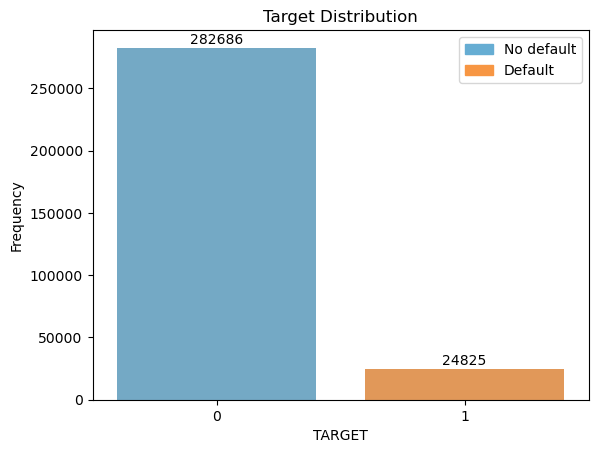

In [20]:
#palette creation
palette = {0: '#66add3', 1: '#f79643'}
#Countplot Creation:
train = sns.countplot(x='TARGET', data=application_train, palette=palette)

plt.title('Target Distribution')
plt.xlabel('TARGET')
plt.ylabel('Frequency')

# Annotations for count values
for pa in train.patches:
    train.annotate(format(pa.get_height(), '.0f'), (pa.get_x() + pa.get_width() / 2., pa.get_height()),ha = 'center', va = 'center', xytext = (0, 6), textcoords = 'offset points')
plt.legend(handles=[mp.Patch(color='#66add3', label='No default'), mp.Patch(color='#f79643', label='Default')])
plt.show()

From the above plot, It clearly shows a significant imbalance data, with a larger number of instances falling under "No default" compared to "Default". Addressing this imbalance("No default") is crucial for developing Home Credit's business model.

<a class="anchor" id="accuracy"></a>

## *4.1 Utilizing a majority class classifier to achieve Accuracy.*

In [21]:
# no.of occurrences of each class in the training dataset
c_count = application_train['TARGET'].value_counts()

# Calculating the percentage 
c_percentage = c_count / len(application_train) * 100

# Print the class counts and percentages
print(c_count)
print(c_percentage)

#Accuracy of the Target variable
max_accuracy = c_percentage.max() / 100

print(f" Accuracy : {max_accuracy}")

0    282686
1     24825
Name: TARGET, dtype: int64
0    91.927118
1     8.072882
Name: TARGET, dtype: float64
 Accuracy : 0.9192711805431351


The accuracy of the majority class classifier corresponds to the percentage of instances belonging to the majority class in the dataset:**0.9192711805431351**

<a class="anchor" id="vis2"></a>

## *4.2 The gender code distribution based on the target variable.*

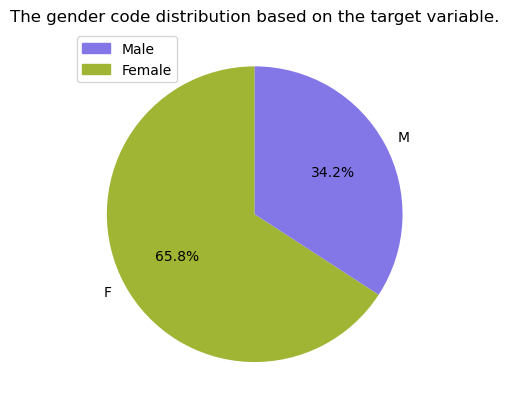

In [22]:
palette = {'M': '#8377e8', 'F': '#a1b535'}
gender_counts = application_train['CODE_GENDER'].value_counts()
labels = gender_counts.index
sizes = gender_counts.values
colors = [palette[gender] for gender in labels]

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('The gender code distribution based on the target variable.')
plt.legend(handles=[mp.Patch(color='#8377e8', label='Male'), mp.Patch(color='#a1b535', label='Female')])

plt.show()

Based on the above plot it clearly shows that **'Female'** Gender Applicants are more likely to take loan and repay it

<a class="anchor" id="vis3"></a>

## *4.3 Loan Default status by Family type based on the target variable.*

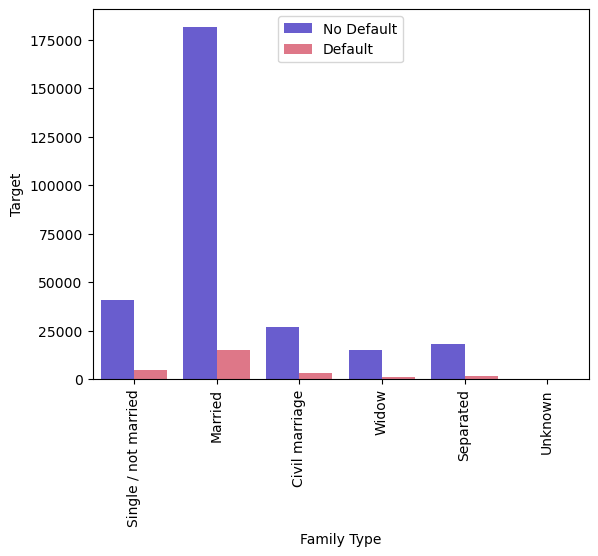

In [23]:
palette = {0: '#5a4ae1', 1: '#ef667d'}
sns.countplot(x='NAME_FAMILY_STATUS', hue='TARGET', data=application_train, palette = palette)
plt.title("")
plt.xticks(rotation = 90)
plt.xlabel('Family Type')
plt.ylabel('Target')
plt.legend(labels = ['No Default', 'Default'])
plt.show()


From the above plot it clearly shows that **'Married'** applicants are more likely to take the loan and repay it

<a class="anchor" id="vis4"></a>

## *4.4 Loan Default status by Income type based on the target variable.*

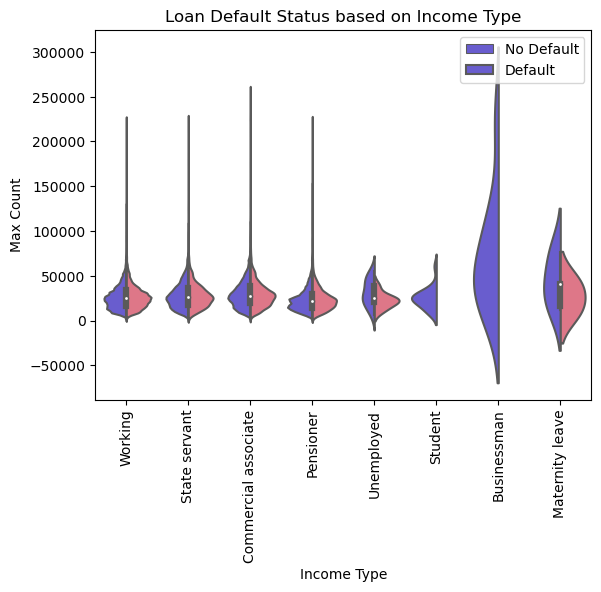

In [24]:
palette = {0: '#5a4ae1', 1: '#ef667d'}
income_type = sns.violinplot(x='NAME_INCOME_TYPE', y='AMT_ANNUITY', hue='TARGET', data=application_train, split=True, palette = palette)
plt.xlabel('Income Type')
plt.xticks(rotation = 90)
plt.ylabel('Max Count')
plt.title('Loan Default Status based on Income Type')
plt.legend(title = 'Target')
plt.legend(labels = ['No Default', 'Default'])
plt.show()

In [25]:
# Ploting Income type in table format for more reabilituy
income_type = application_train.pivot_table(index = ["NAME_INCOME_TYPE"],
                                      columns= ["TARGET"],
                                      values = 'SK_ID_CURR', aggfunc="count")
income_type


TARGET,0,1
NAME_INCOME_TYPE,,
Businessman,10.0,NaN
Commercial associate,66257.0,5360.0
Maternity leave,3.0,2.0
Pensioner,52380.0,2982.0
State servant,20454.0,1249.0
Student,18.0,NaN
Unemployed,14.0,8.0
Working,143550.0,15224.0


From the above plot it clearly shows that that **'Businessman'** clients will always repay the annuity, followed by **'Student'** clients. Where as under **'Maternity Leave'** category 2/3 people are defau;lted on loans which need to be more address for the for developing Home Credit's business model.

<a class="anchor" id="vis5"></a>

## *4.5 Loan Default status by Housing type based on the target variable.*

From the above plot, it clearly shows that applicats having **'House/Apartment'** are more likely to take loan and repay it

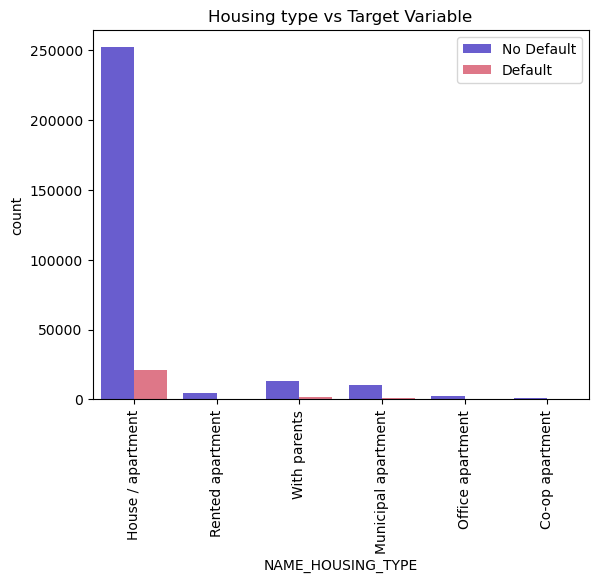

In [26]:
palette = {0: '#5a4ae1', 1: '#ef667d'}
sns.countplot(x='NAME_HOUSING_TYPE', hue='TARGET', data=application_train, palette = palette)
plt.title("Housing type vs Target Variable")
plt.xticks(rotation = 90)
plt.legend(labels = ['No Default', 'Default'])
plt.show()

From the above plot, it clearly shows that applicats having **'House/Apartment'** are more likely to take loan and repay it

<a class="anchor" id="vis6"></a>

## *4.6 Loan Distribution Analysis*

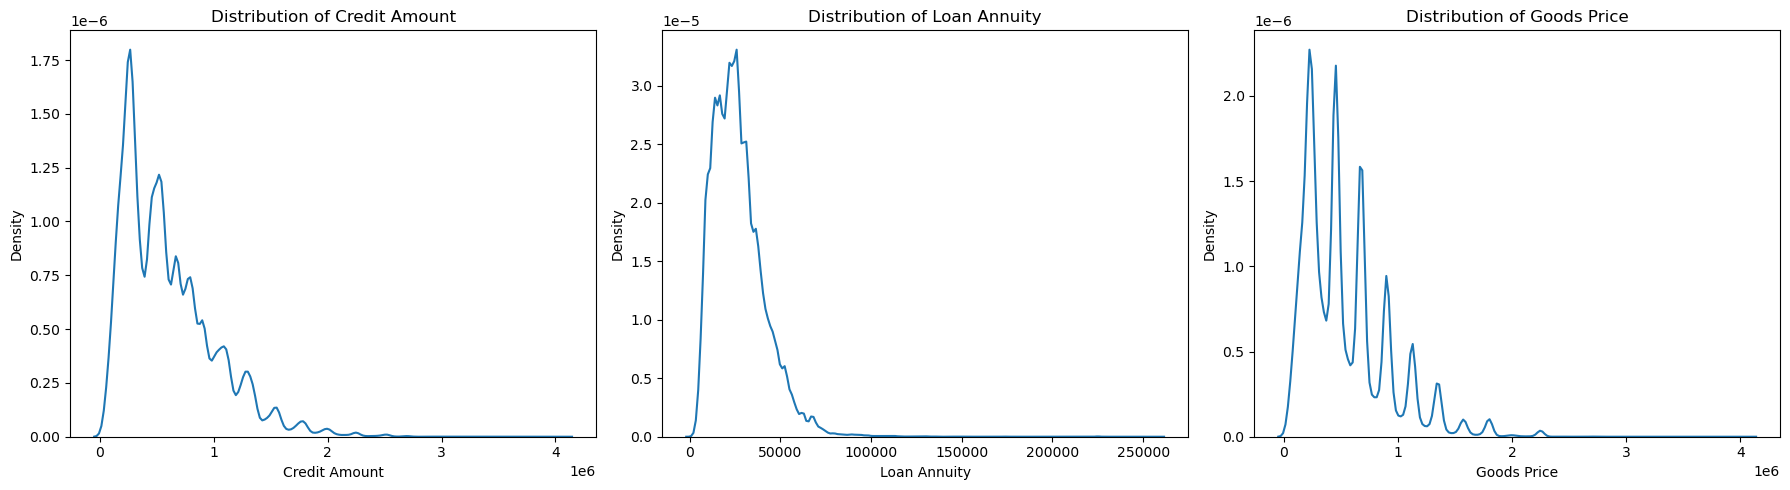

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Distribution of Credit Amount 
sns.kdeplot(ax=axes[0], data=application_train, x="AMT_CREDIT")
axes[0].set_title("Distribution of Credit Amount")
axes[0].set_xlabel("Credit Amount")
axes[0].set_ylabel("Density")

# Distribution of Loan Annuity
sns.kdeplot(ax=axes[1], data=application_train, x="AMT_ANNUITY")
axes[1].set_title("Distribution of Loan Annuity")
axes[1].set_xlabel("Loan Annuity")
axes[1].set_ylabel("Density")

# Distribution of Good Price
sns.kdeplot(ax=axes[2], data=application_train, x="AMT_GOODS_PRICE")
axes[2].set_title("Distribution of Goods Price")
axes[2].set_xlabel("Goods Price")
axes[2].set_ylabel("Density")

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

<a class="anchor" id="vis6"></a>

## *4.7 Assessing Financial Capacity through Loans and Mortgages*


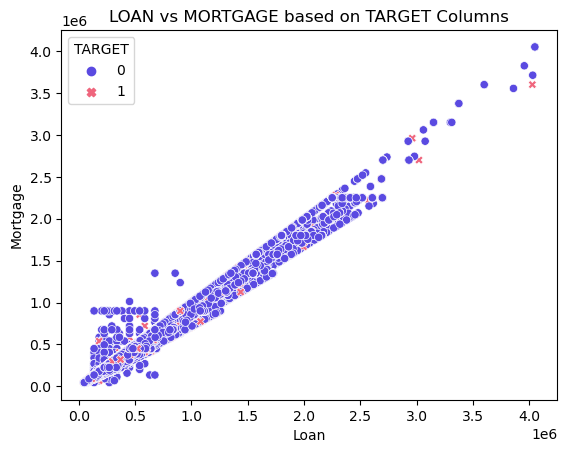

In [28]:
palette = {0: '#5a4ae1', 1: '#ef667d'}
# Create the scatter plot
sns.scatterplot(x='AMT_CREDIT', y='AMT_GOODS_PRICE', hue='TARGET', style='TARGET', data=application_train, palette = palette)
# Set plot title and axis labels
plt.title('LOAN vs MORTGAGE based on TARGET Columns')
plt.xlabel('Loan')
plt.ylabel('Mortgage')
plt.show()


The graphical representation highlights a notable concentration of default risk within the lower spectrum of both loan and mortgage values. Subsequently, there is an almost linear escalation of default risk as loan and mortgage values increase.

<a class="anchor" id="correlation"></a>

## *4.8 Correlations between the target variable and predictors*

In [29]:

correlation_matrix = application_train.corr()
correlation_matrix

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,0.000849,-0.001500,0.001366,...,0.000509,0.000167,0.001073,0.000282,-0.002672,-0.002193,0.002099,0.000485,0.001025,0.004659
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,-0.037227,0.078239,-0.044932,...,-0.007952,-0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,-0.012462,-0.002022,0.019930
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.012882,0.002145,0.021374,-0.001827,-0.025573,0.330938,-0.239818,...,0.004031,0.000864,0.000988,-0.002450,-0.000410,-0.000366,-0.002436,-0.010808,-0.007836,-0.041550
AMT_INCOME_TOTAL,-0.001820,-0.003982,0.012882,1.000000,0.156870,0.191657,0.159610,0.074796,0.027261,-0.064223,...,0.003130,0.002408,0.000242,-0.000589,0.000709,0.002944,0.002387,0.024700,0.004859,0.011690
AMT_CREDIT,-0.000343,-0.030369,0.002145,0.156870,1.000000,0.770138,0.986968,0.099738,-0.055436,-0.066838,...,0.034329,0.021082,0.031023,-0.016148,-0.003906,0.004238,-0.001275,0.054451,0.015925,-0.048448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,-0.002193,0.002704,-0.000366,0.002944,0.004238,0.002185,0.004677,0.001399,0.002255,0.000472,...,0.013281,0.001126,-0.000120,-0.001130,0.230374,1.000000,0.217412,-0.005258,-0.004416,-0.003355
AMT_REQ_CREDIT_BUREAU_WEEK,0.002099,0.000788,-0.002436,0.002387,-0.001275,0.013881,-0.001007,-0.002149,-0.001336,0.003072,...,-0.004640,-0.001275,-0.001770,0.000081,0.004706,0.217412,1.000000,-0.014096,-0.015115,0.018917
AMT_REQ_CREDIT_BUREAU_MON,0.000485,-0.012462,-0.010808,0.024700,0.054451,0.039148,0.056422,0.078607,0.001372,-0.034457,...,-0.001565,-0.002729,0.001285,-0.003612,-0.000018,-0.005258,-0.014096,1.000000,-0.007789,-0.004975
AMT_REQ_CREDIT_BUREAU_QRT,0.001025,-0.002022,-0.007836,0.004859,0.015925,0.010124,0.016432,-0.001279,-0.011799,0.015345,...,-0.005125,-0.001575,-0.001010,-0.002004,-0.002716,-0.004416,-0.015115,-0.007789,1.000000,0.076208


From the above  dataset's correlation matrix it shows that each variable is correlated with the other variables within the dataset. A positive relationship is indicated by a linear correlation coefficient greater than zero. A value less than zero indicates a negative relationship. This helps us determine whether we should look at these two values together to see how the combination affects our target variable.

In [30]:
correlation_target_matrix = correlation_matrix["TARGET"]
correlation_target = correlation_target_matrix.sort_values(ascending=False)
correlation_target

TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
                                 ...   
FLOORSMAX_AVG                 -0.044003
DAYS_EMPLOYED                 -0.044932
EXT_SOURCE_1                  -0.155317
EXT_SOURCE_2                  -0.160472
EXT_SOURCE_3                  -0.178919
Name: TARGET, Length: 106, dtype: float64

This analysis illustrates the relationship between predictors and the target variable "TARGET", in the Home Credit Default Risk dataset. A higher correlation coefficient signifies a stronger relationship. Notably, predictors like DAYS_EMPLOYED,FLOORSMAX_AVG and EXT_SOURCE exhibit robust negative correlations with "TARGET," suggesting that higher values of these factors are associated with lower loan default probabilities. Conversely, DAYS_BIRTH , DAYS_LAST_PHONE_CHANGE, REGION_RATING_CLIENT, and REGION_RATING_CLIENT_W_CITY display significant positive correlations, indicating that increasing values in these predictors are linked to higher probabilities of loan default. This insight aids in understanding the influential factors affecting credit risk in the dataset.

<a class="anchor" id="variance"></a>

## *4.9 Variance*

In [31]:
# Compute and sort the variance for each column
column_variances = application_train.var().sort_values(ascending=True)

# Display the variance for each column
print(column_variances)

FLAG_MOBIL          3.251916e-06
FLAG_DOCUMENT_12    6.503811e-06
FLAG_DOCUMENT_10    2.276297e-05
FLAG_DOCUMENT_2     4.227326e-05
FLAG_DOCUMENT_4     8.129156e-05
                        ...     
SK_ID_CURR          1.056582e+10
DAYS_EMPLOYED       1.995884e+10
AMT_INCOME_TOTAL    5.622739e+10
AMT_GOODS_PRICE     1.364907e+11
AMT_CREDIT          1.619988e+11
Length: 106, dtype: float64


/var/folders/85/y05h4q8s4xqfc5ybn8fg_0k40000gw/T/ipykernel_19768/243476092.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  column_variances = application_train.var().sort_values(ascending=True)


In [32]:
# Identify columns with zero variance
zero_variance_columns = column_variances[column_variances == 0].index

# Display columns with zero variance
print(zero_variance_columns)

Index([], dtype='object')


From the above results there are no columns with zero variance, which is generally a positive sign because it indicates that there is some diversity in the data. 

In [33]:
# Identify columns with variance near zero
variance_near_zero = column_variances[column_variances < 0.001].index

# Display columns with near zero variance
print(variance_near_zero)

Index(['FLAG_MOBIL', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_4', 'REGION_POPULATION_RELATIVE', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_19'],
      dtype='object')


<a class="anchor" id="numcat"></a>

# **5. Categorical and Numerical Variables**

In [34]:
# Categorical Variables
cat_cols = application_train.select_dtypes(include=['object']).columns
print(cat_cols)

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')


In [35]:
# Numerical Variables

cols = []
for i in list(application_train.columns):
  cols.append(i)

num_cols = list(application_train._get_numeric_data().columns) #storing numerical cols in num_cols
num_cols = num_cols[2:]
num_cols

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXP

In [36]:
cat_df = application_train[cat_cols]
cat_df.isna().sum()

NAME_CONTRACT_TYPE                 0
CODE_GENDER                        4
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
OCCUPATION_TYPE                96391
WEEKDAY_APPR_PROCESS_START         0
ORGANIZATION_TYPE                  0
FONDKAPREMONT_MODE            210295
HOUSETYPE_MODE                154297
WALLSMATERIAL_MODE            156341
EMERGENCYSTATE_MODE           145755
dtype: int64

In [37]:
num_df = application_train[num_cols]
num_df.columns
nulls = num_df.isna().sum()
nulls[nulls> 0]

AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
OWN_CAR_AGE                   202929
CNT_FAM_MEMBERS                    2
EXT_SOURCE_1                  173378
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
Length: 61, dtype: int64

<a class="anchor" id="outliers"></a>

# **6. Outliers**

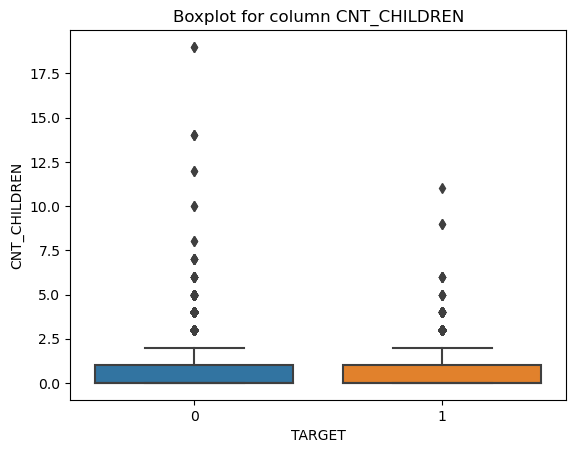

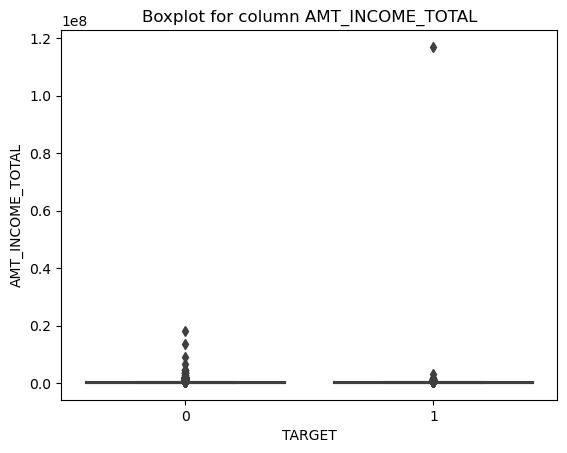

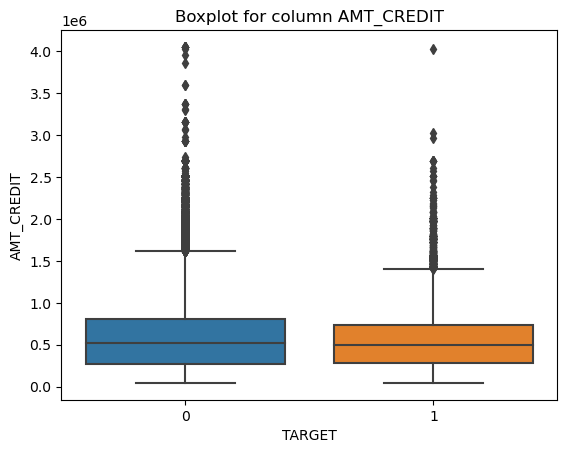

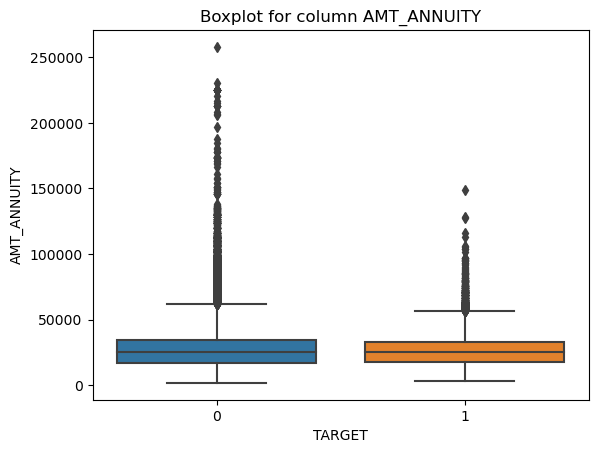

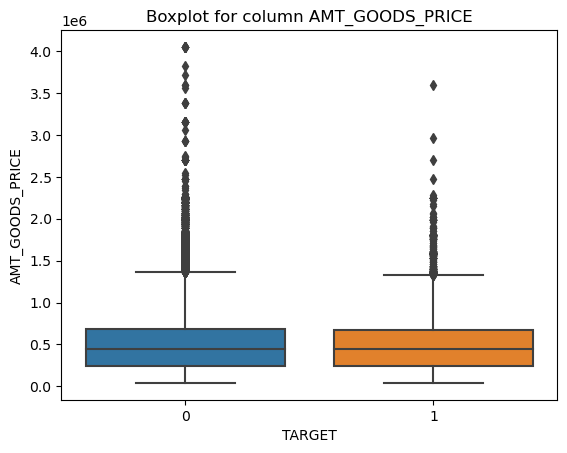

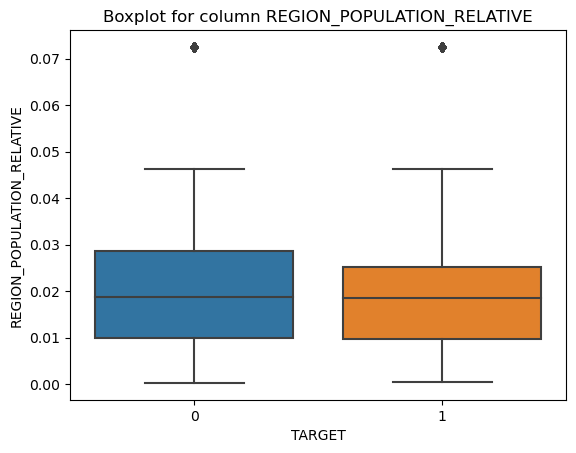

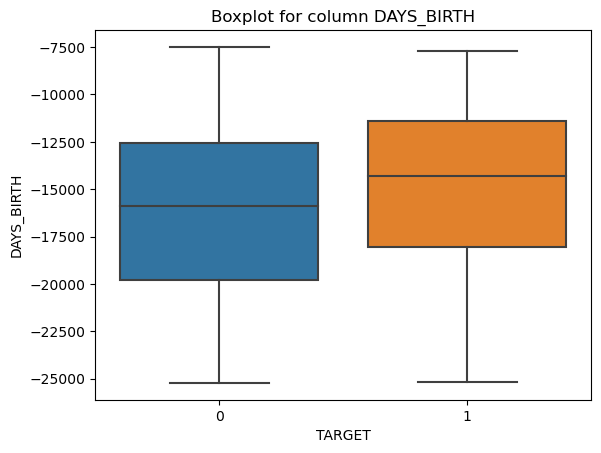

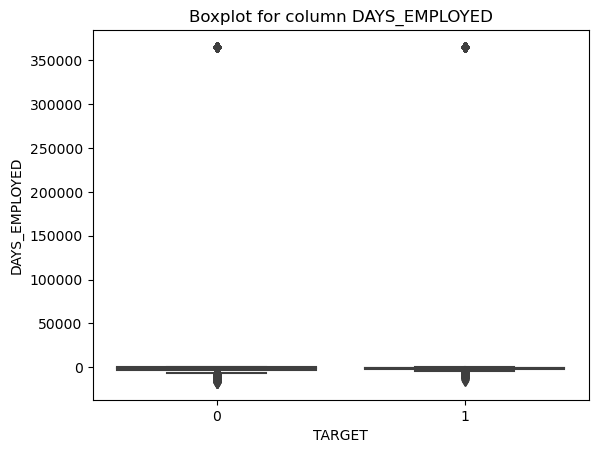

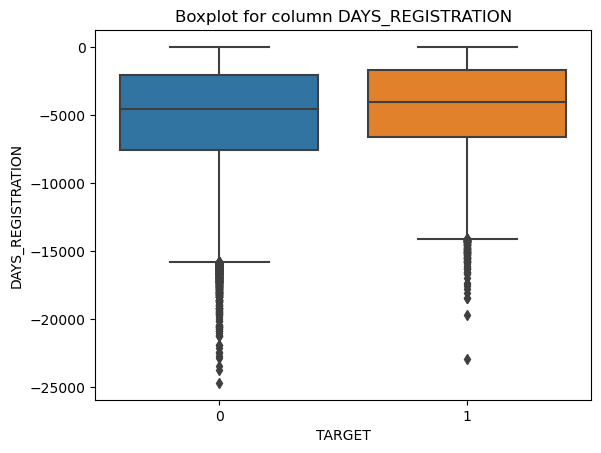

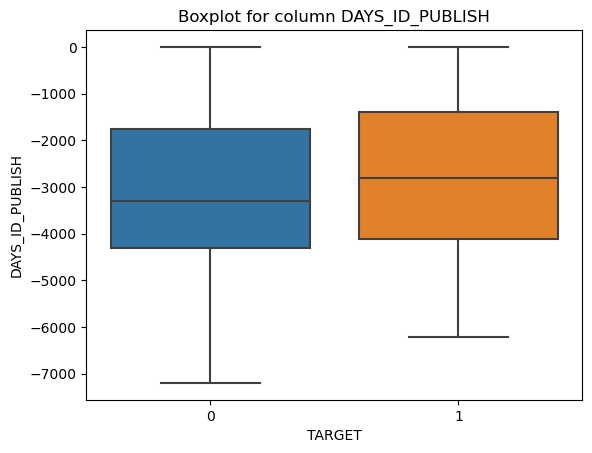

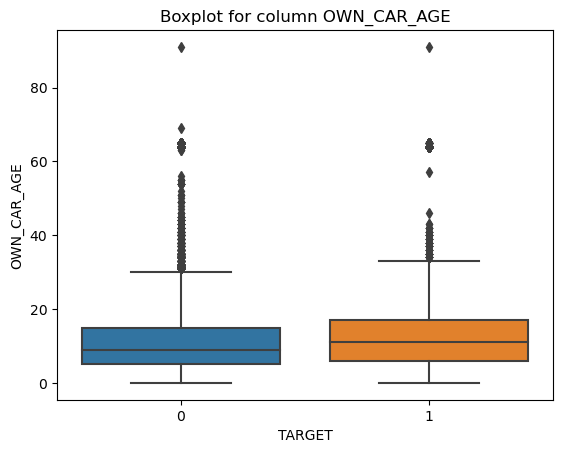

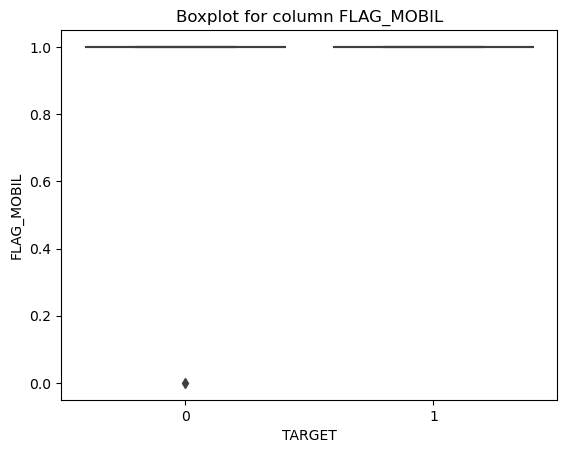

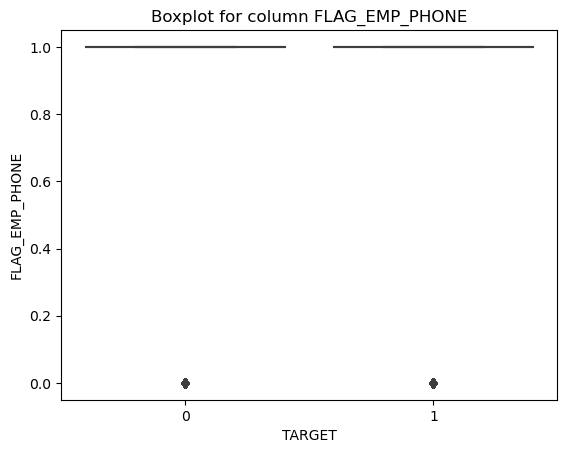

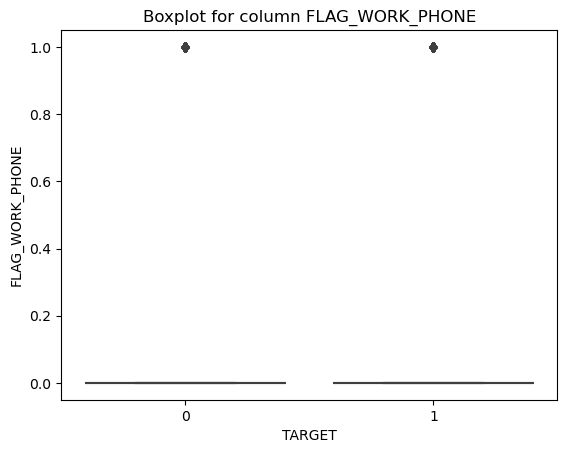

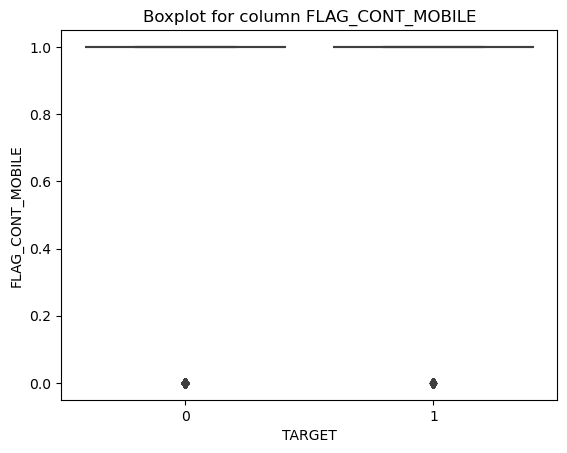

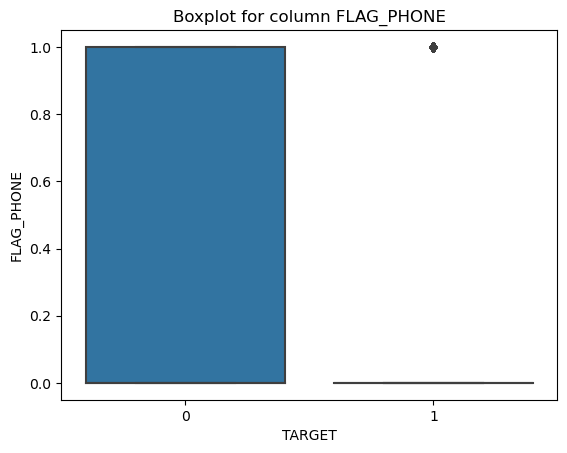

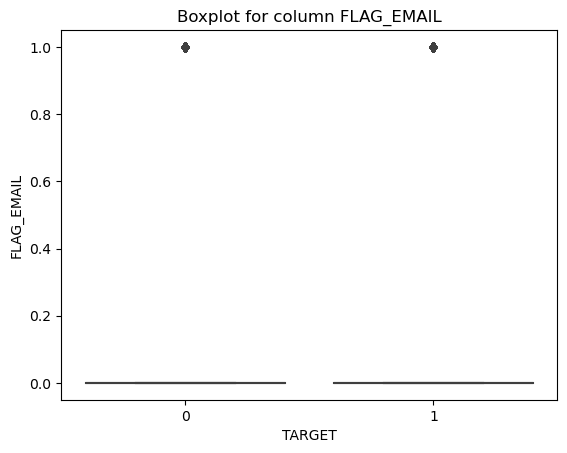

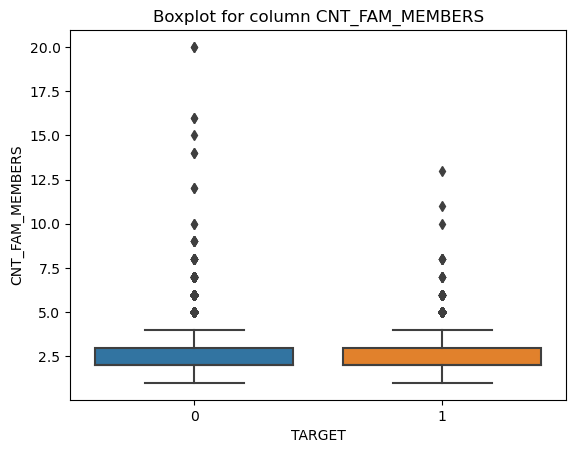

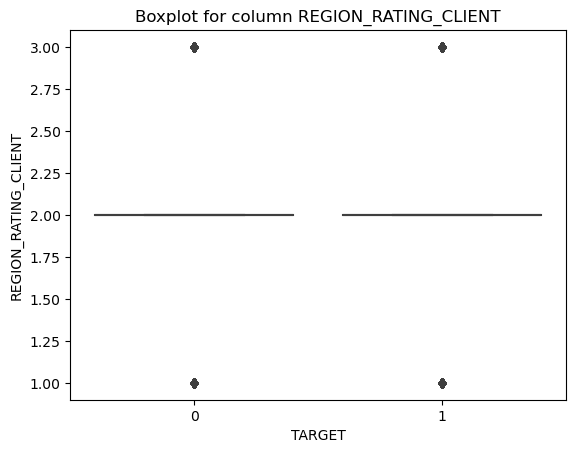

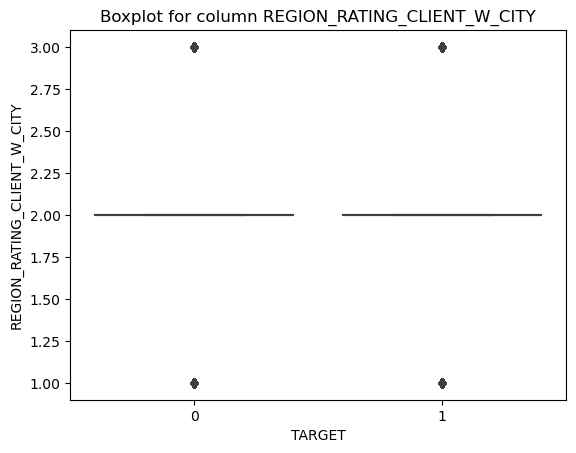

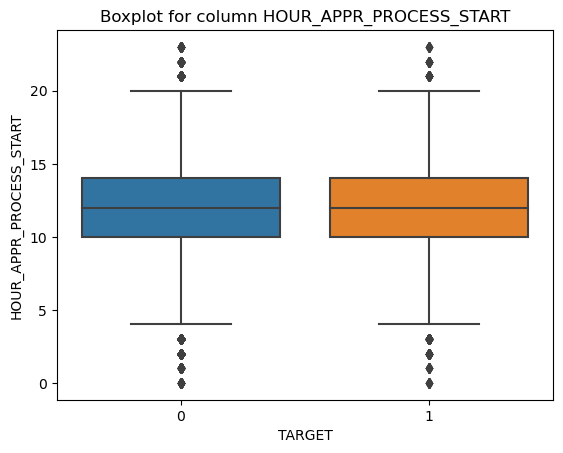

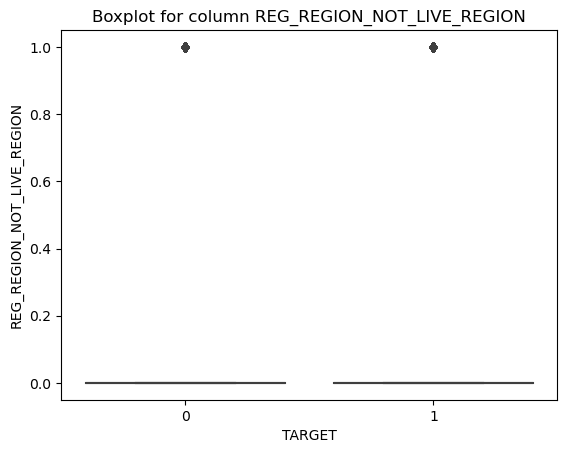

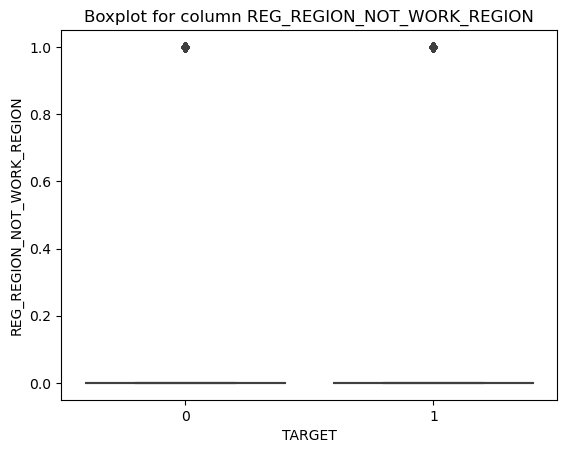

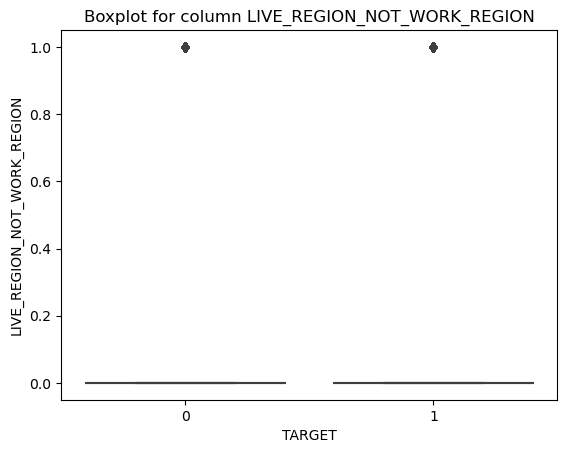

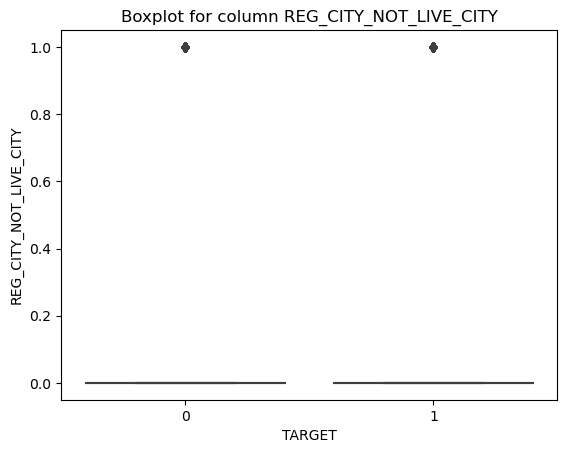

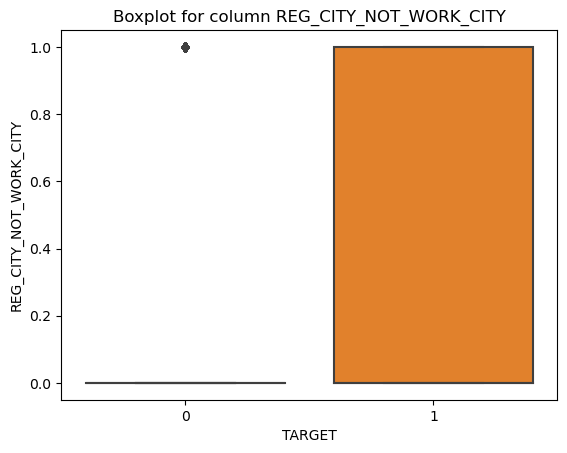

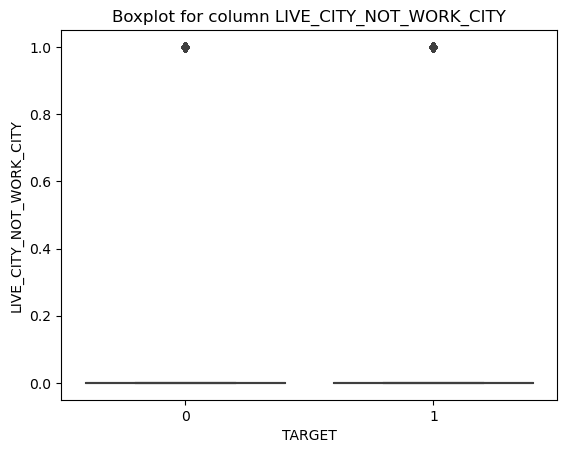

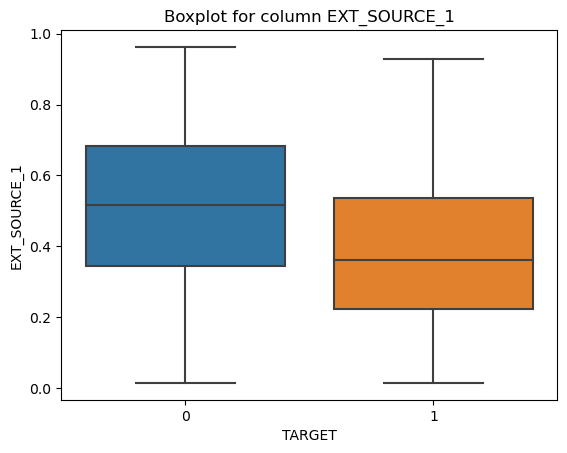

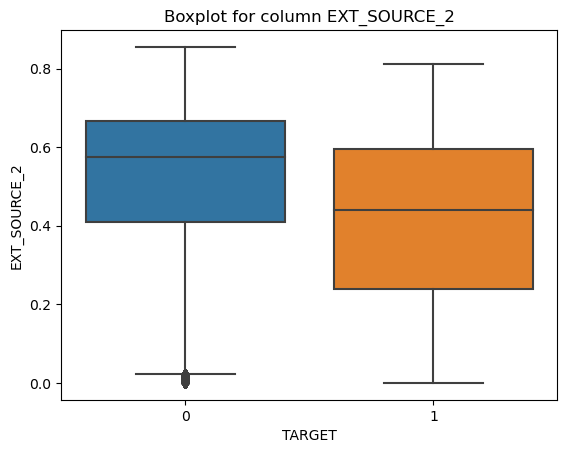

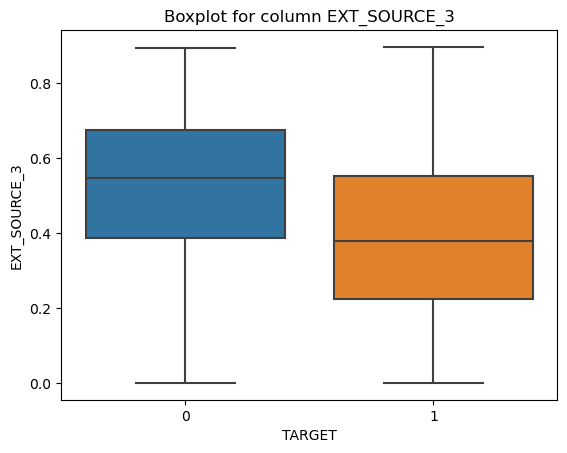

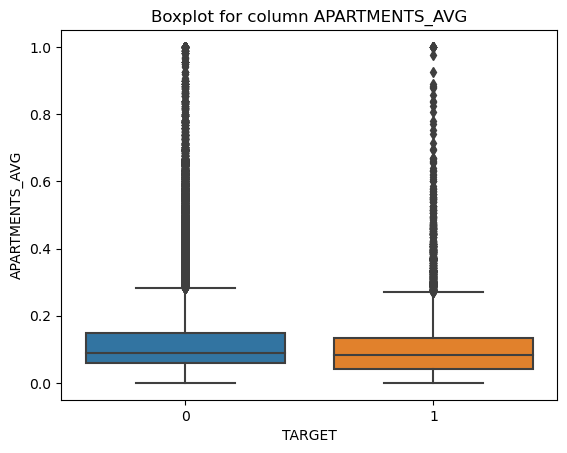

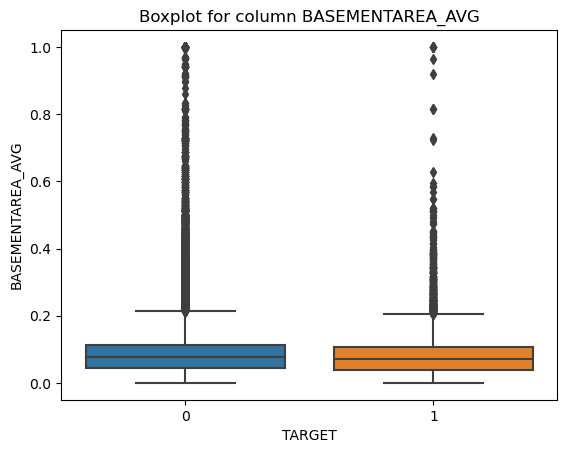

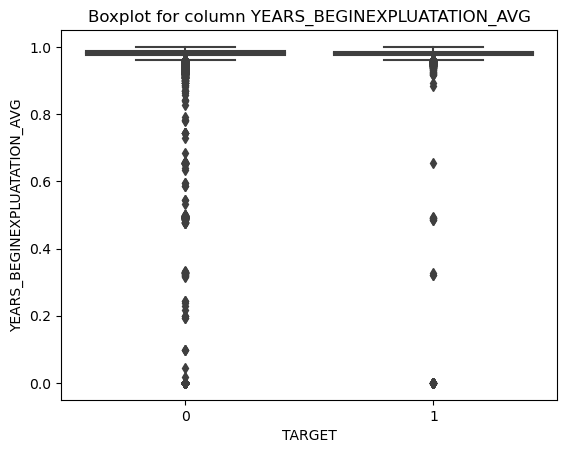

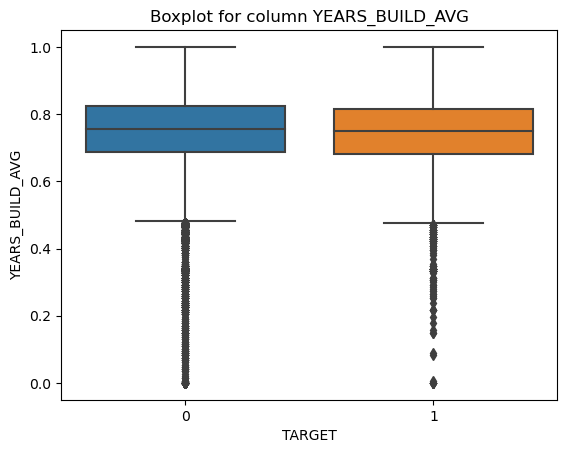

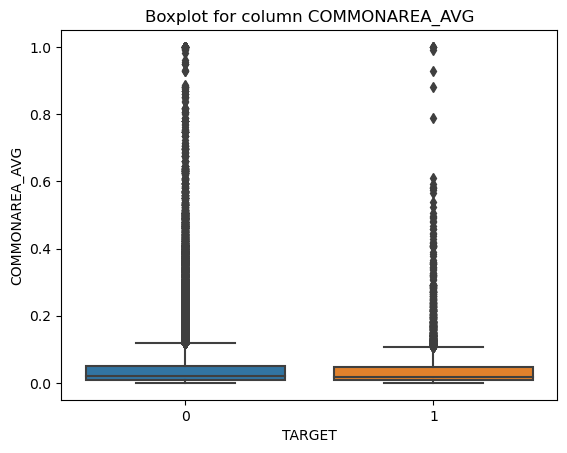

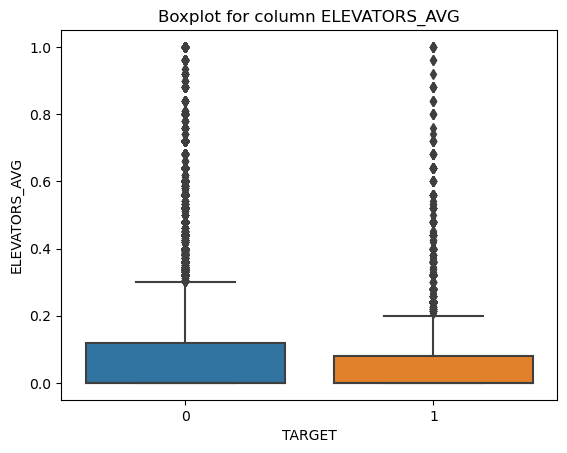

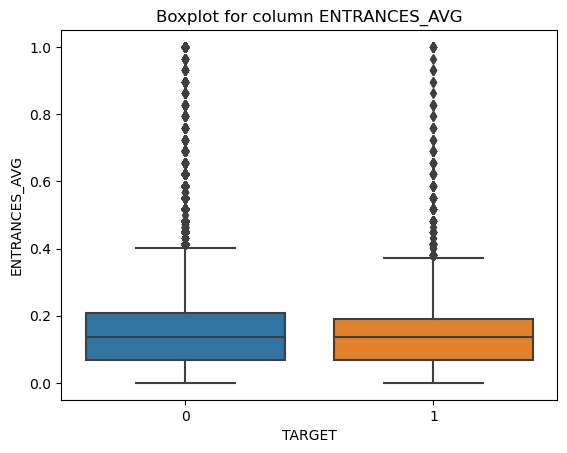

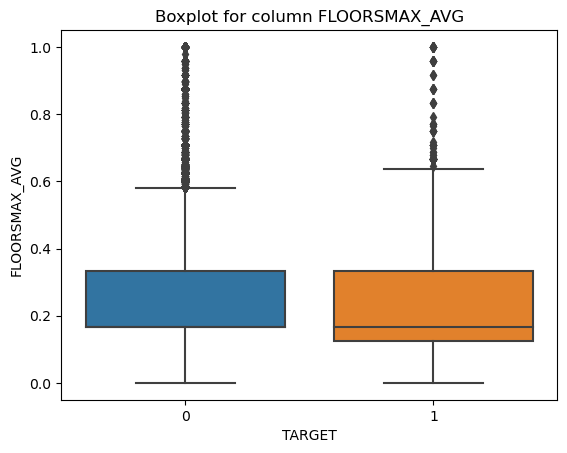

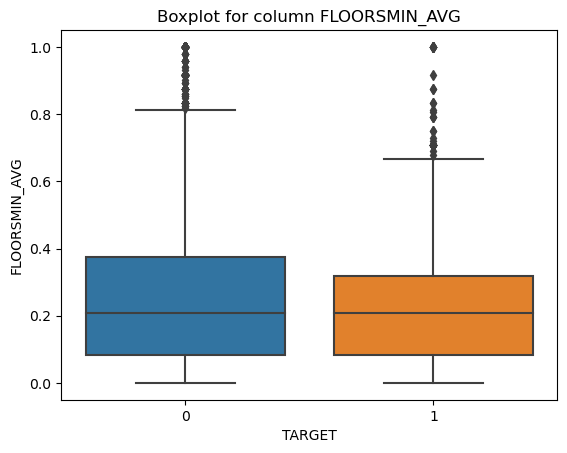

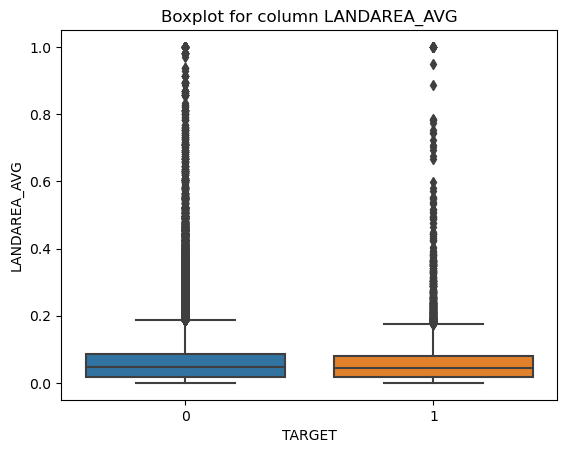

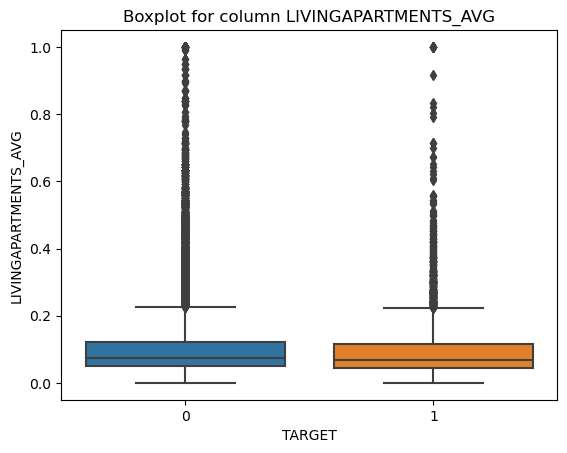

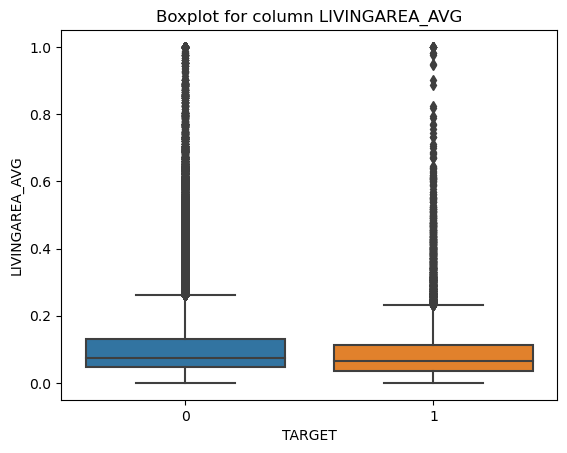

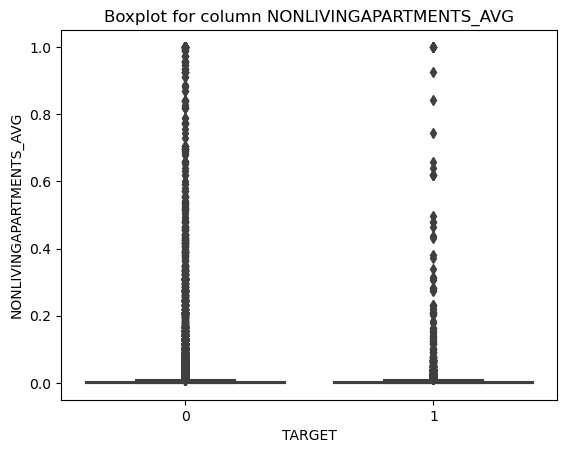

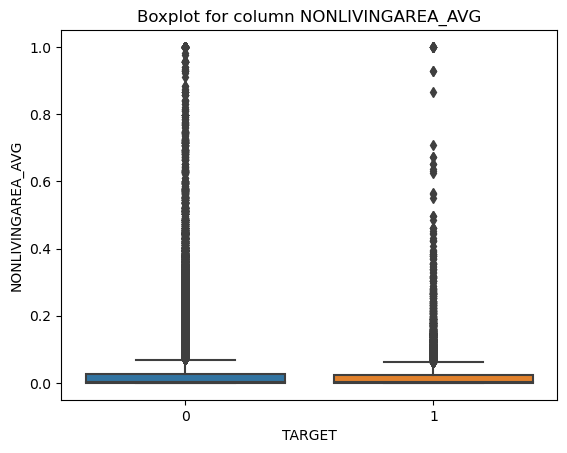

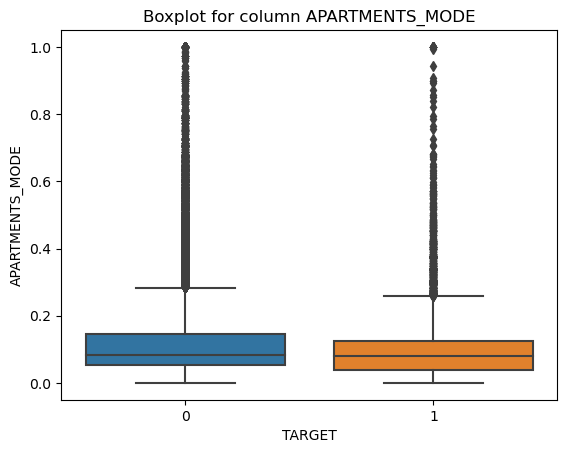

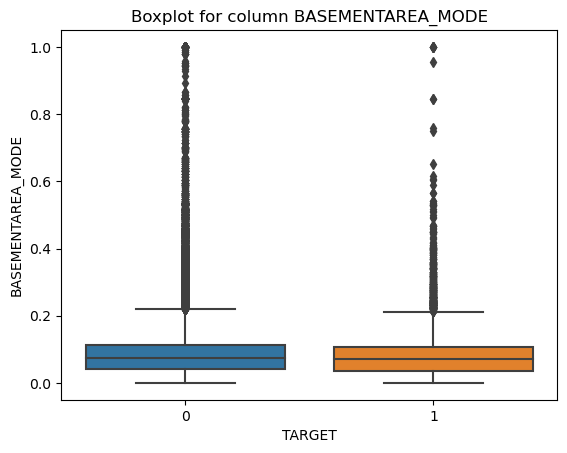

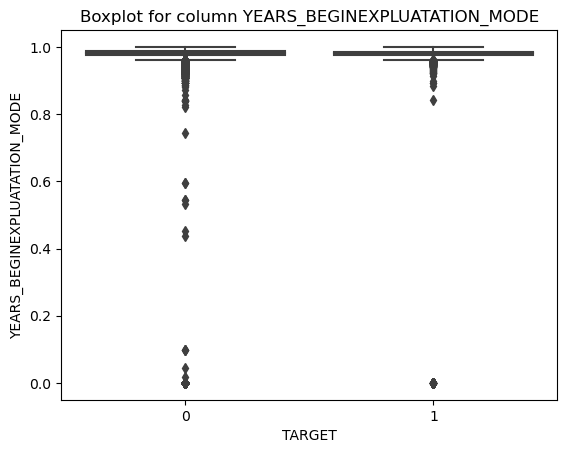

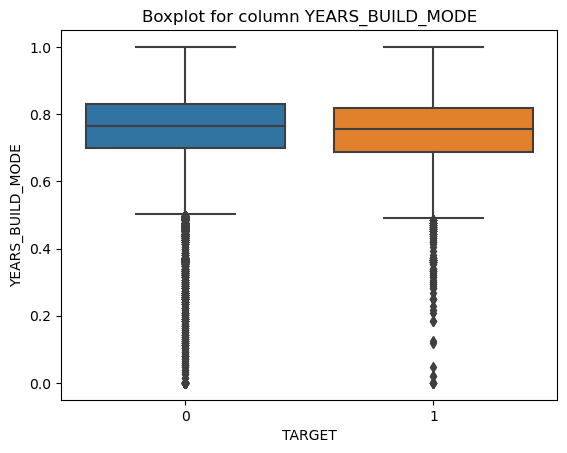

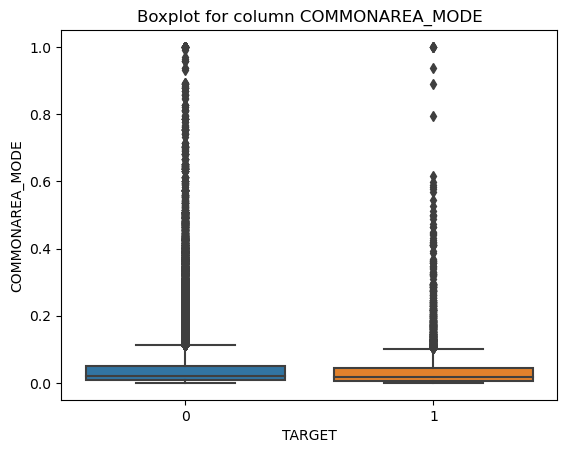

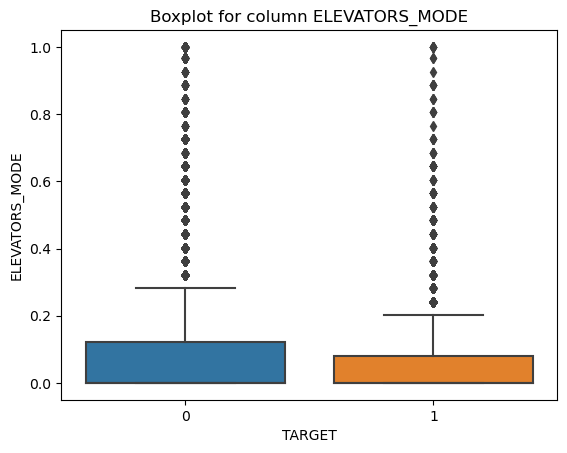

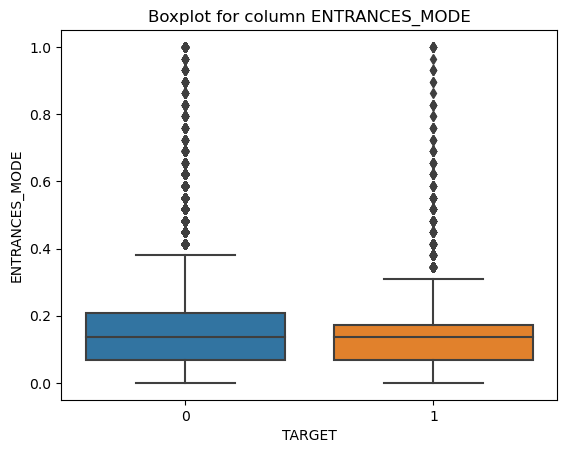

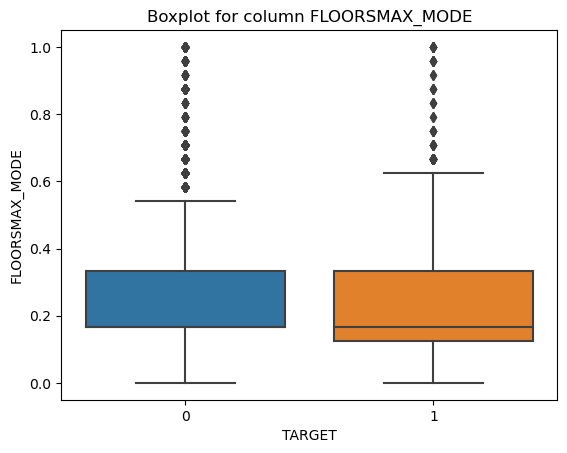

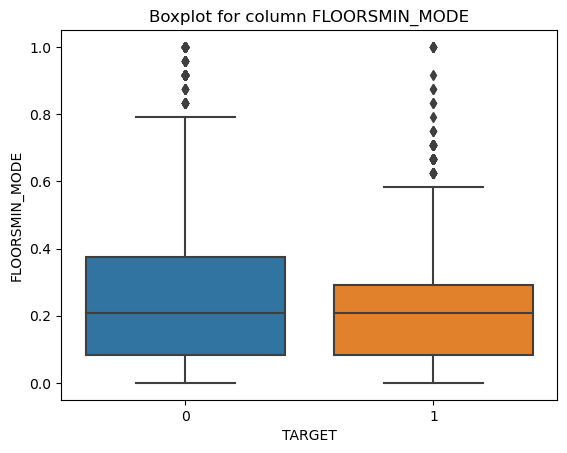

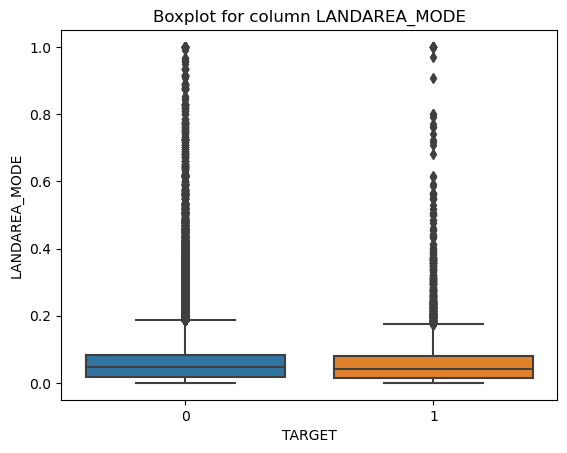

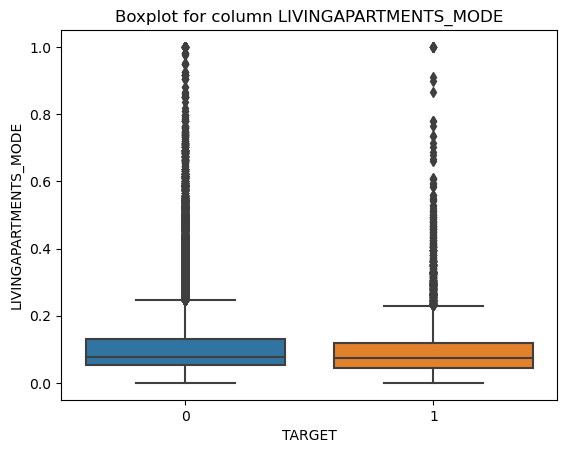

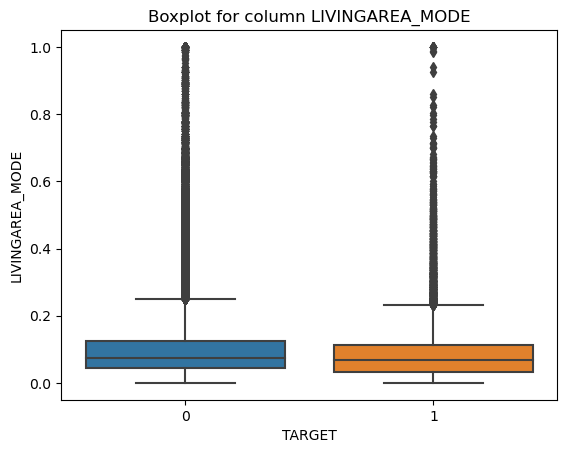

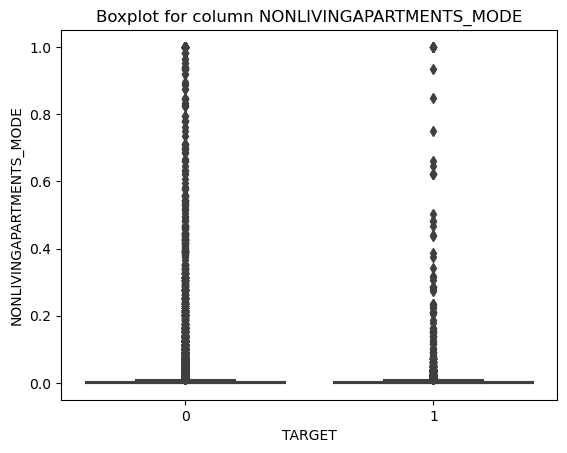

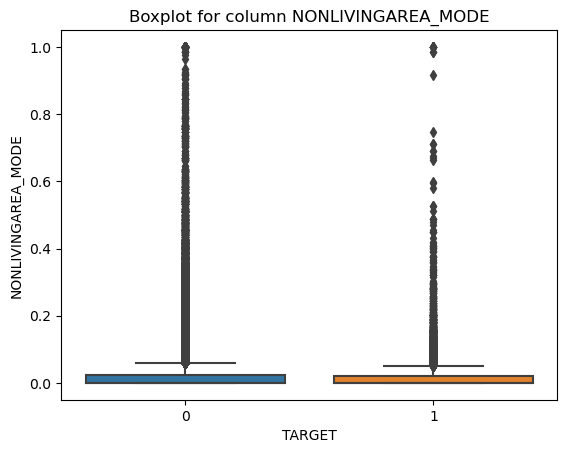

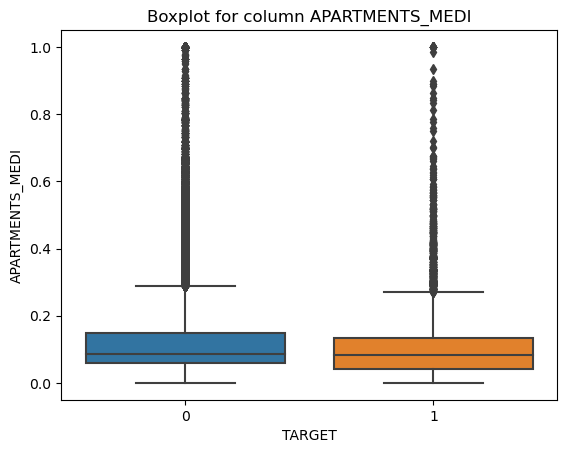

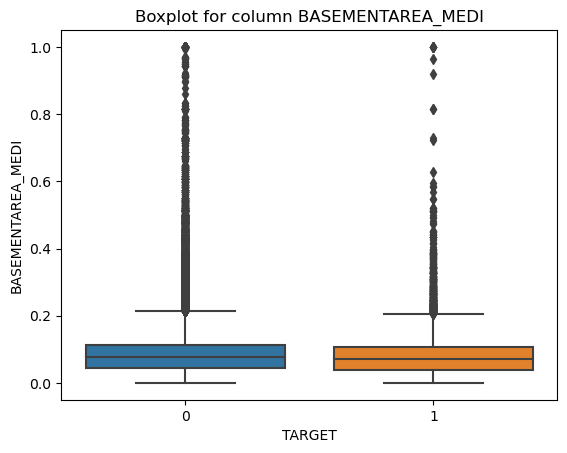

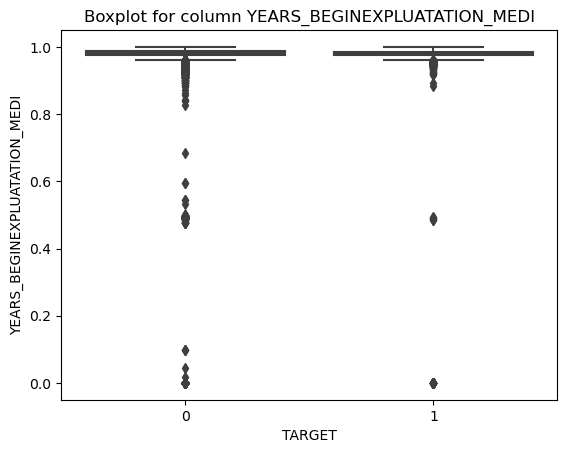

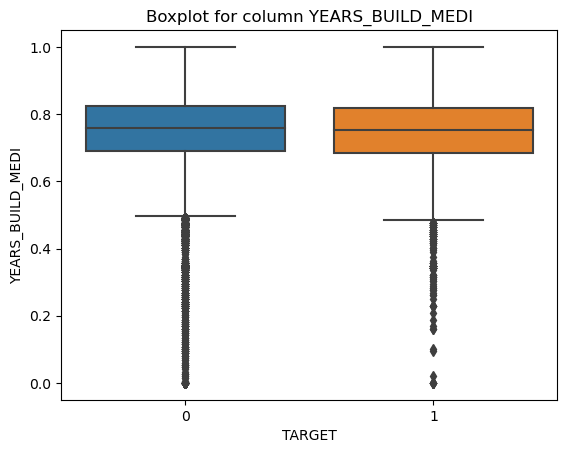

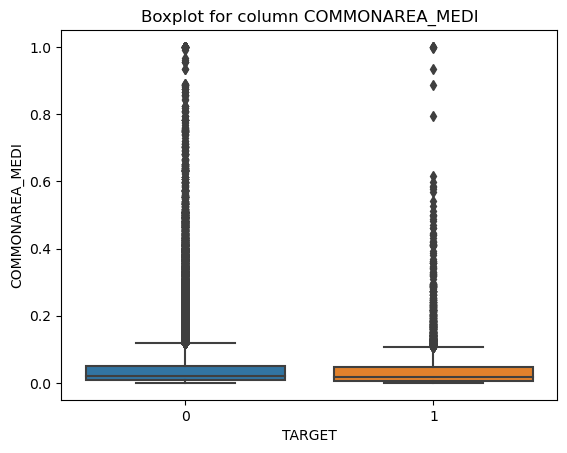

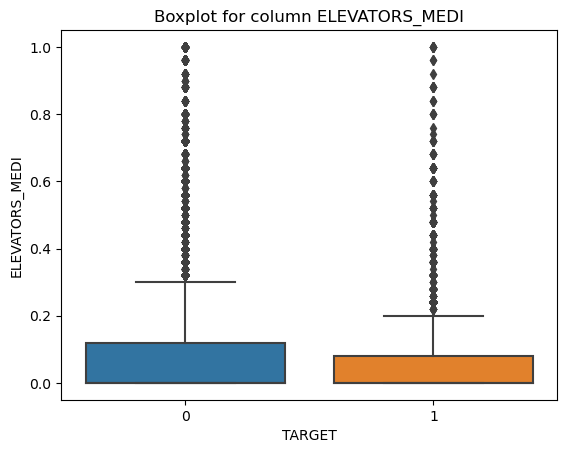

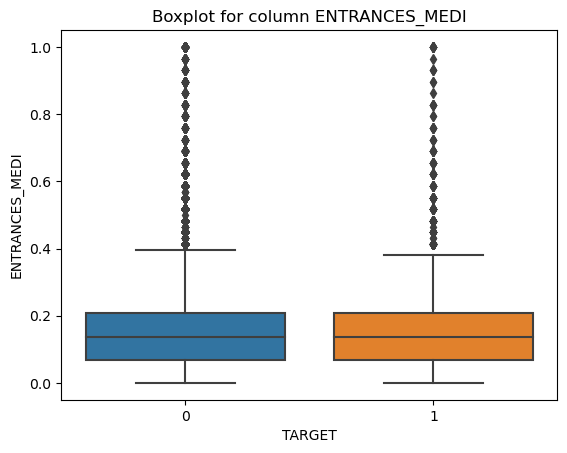

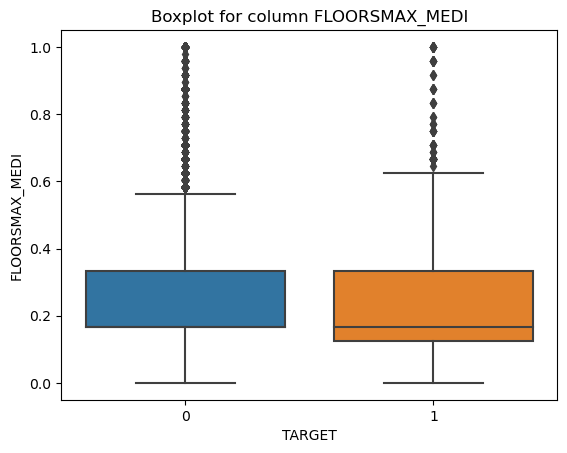

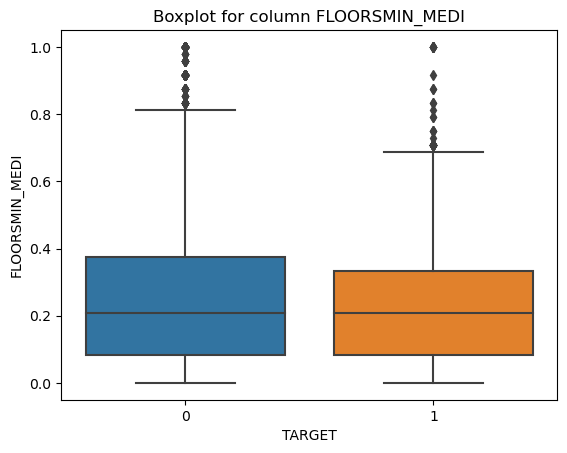

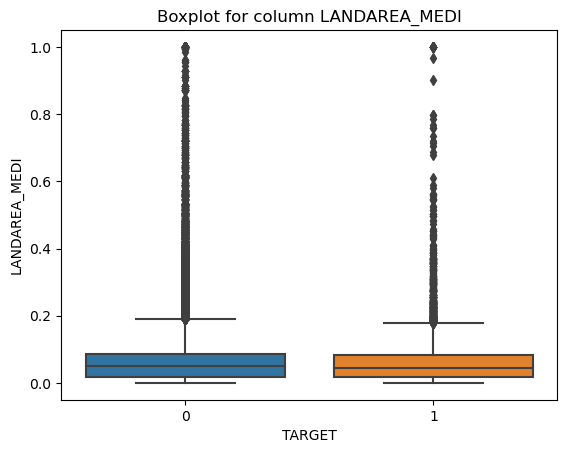

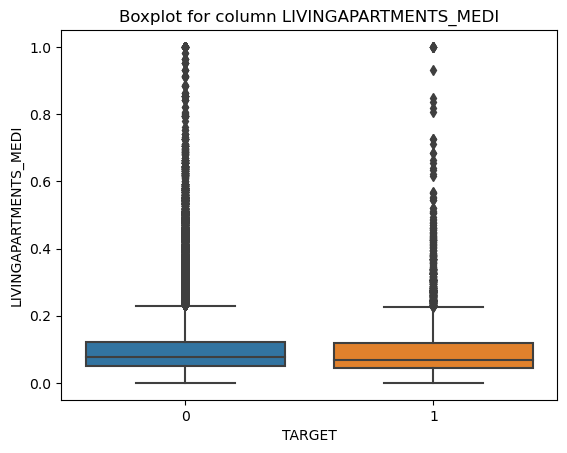

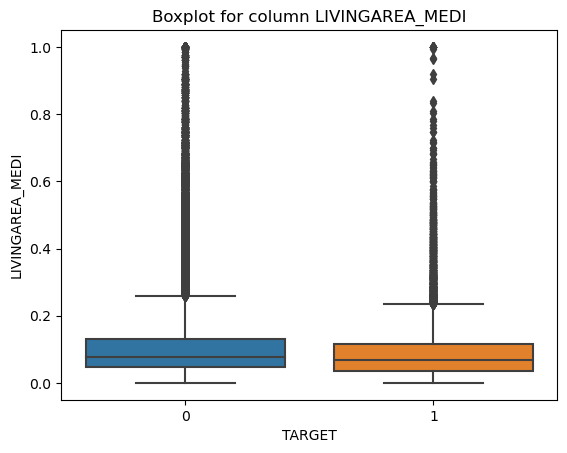

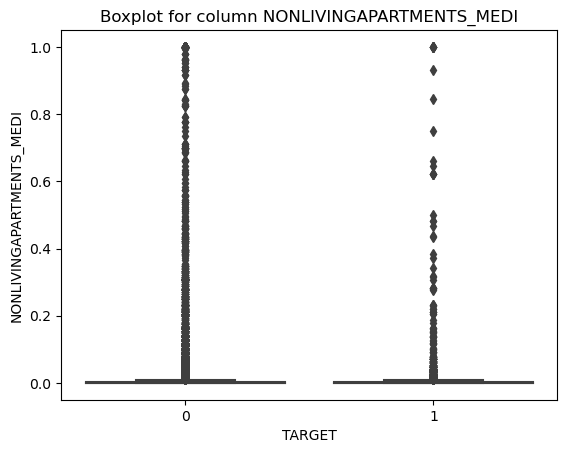

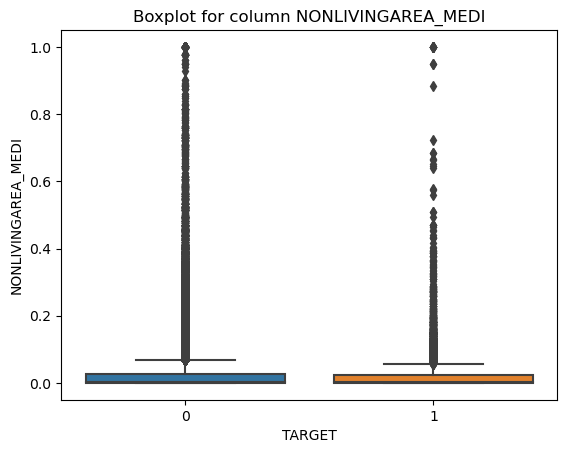

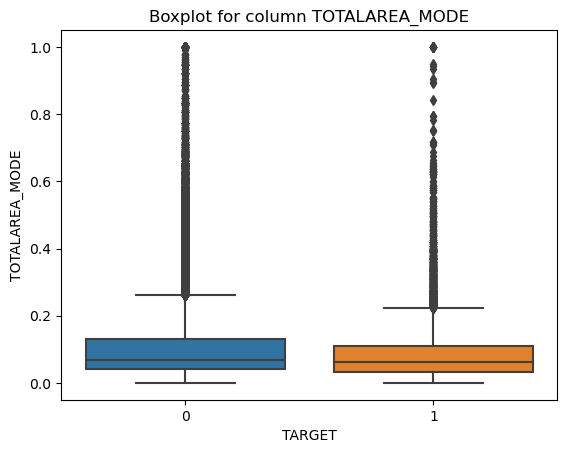

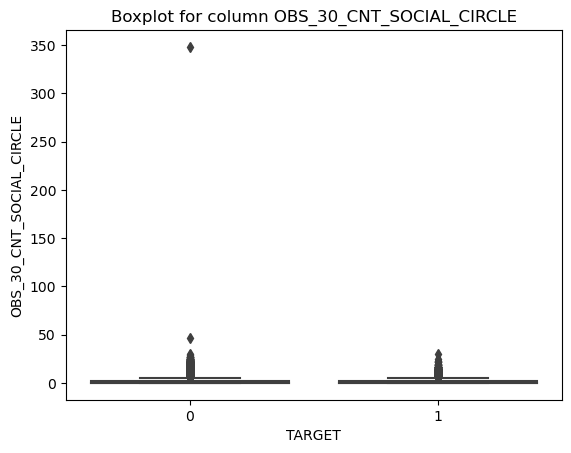

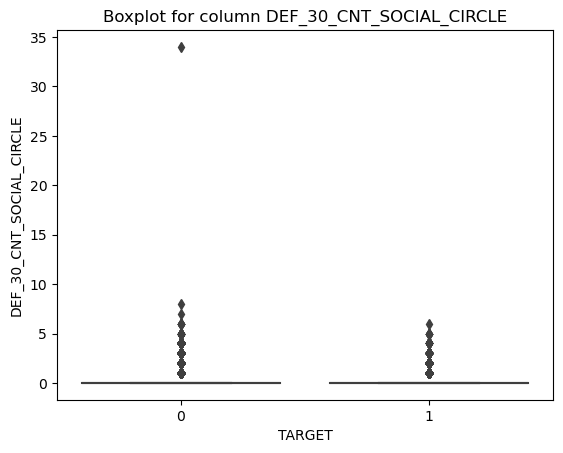

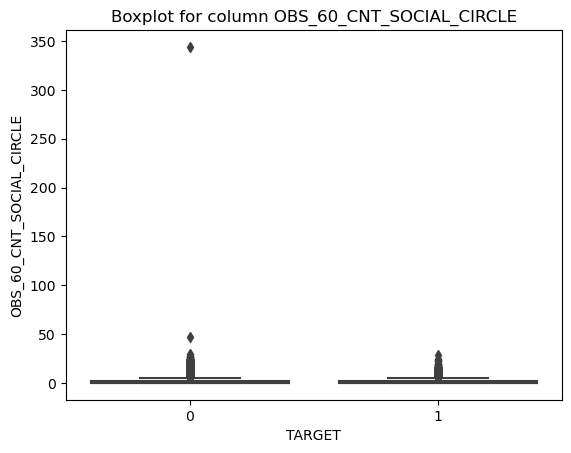

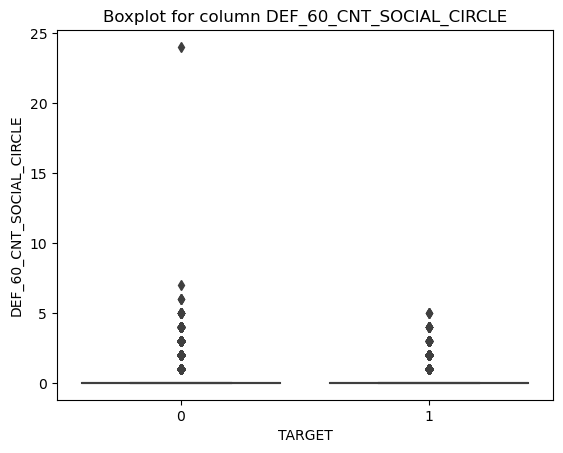

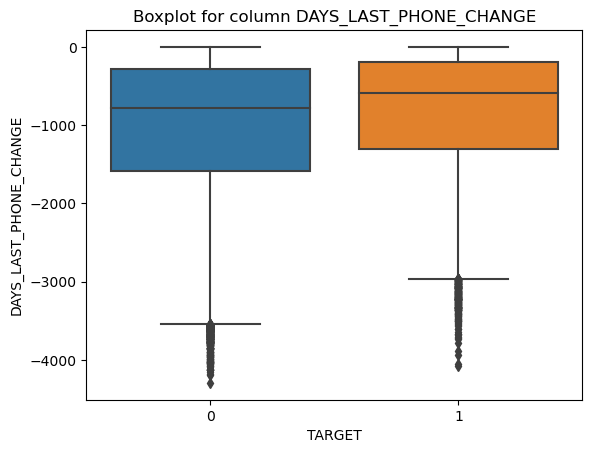

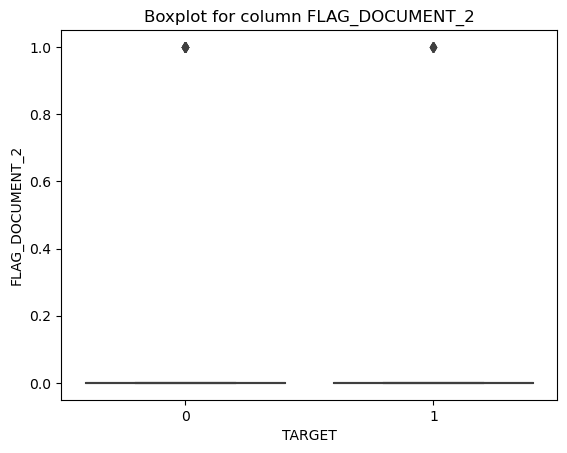

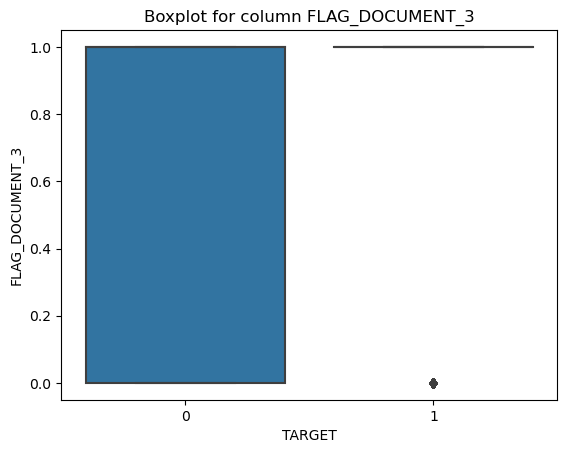

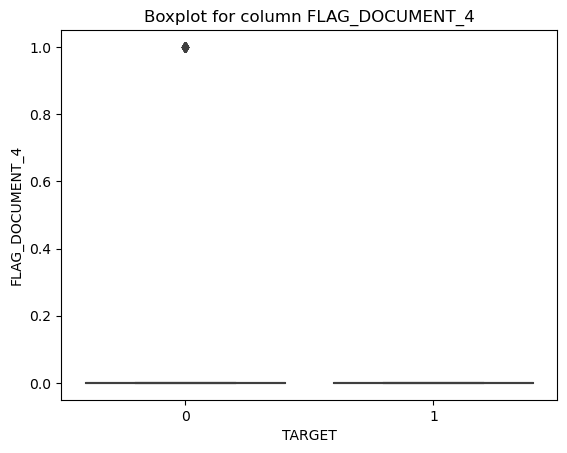

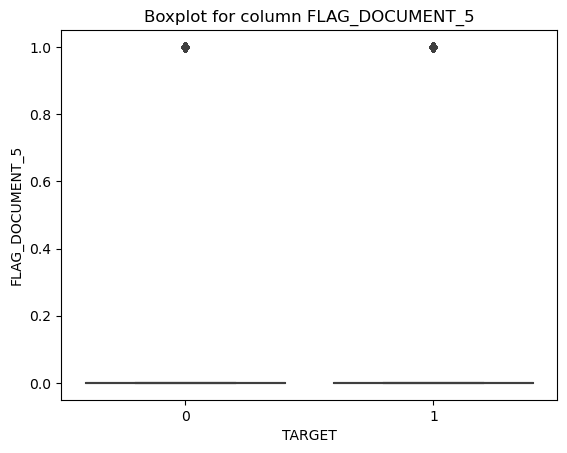

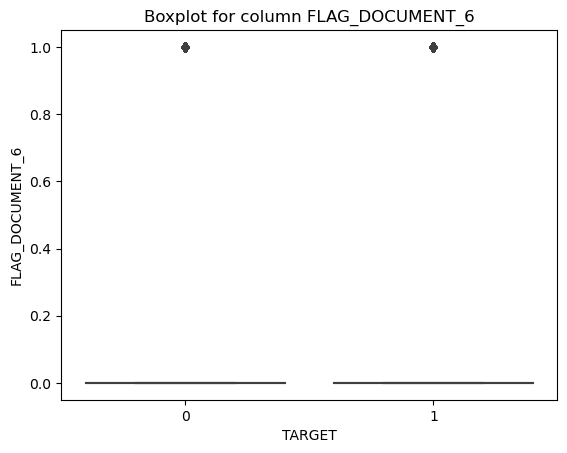

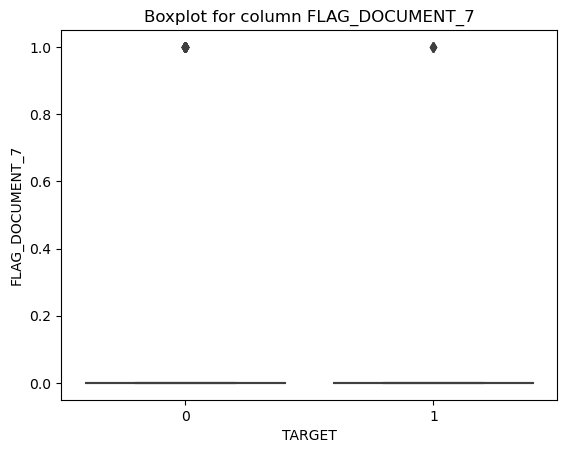

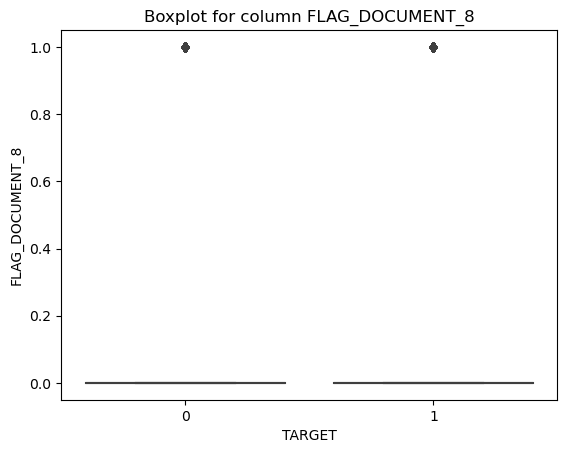

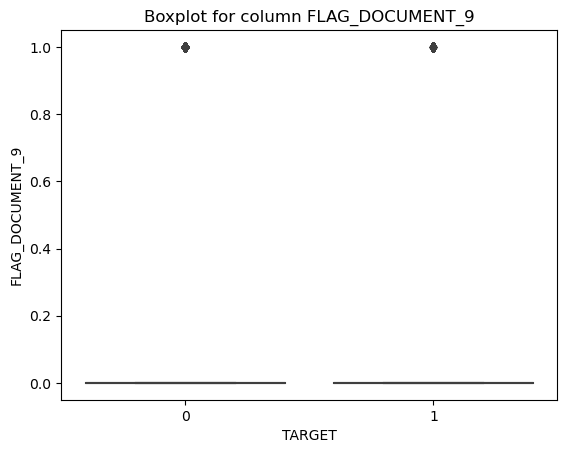

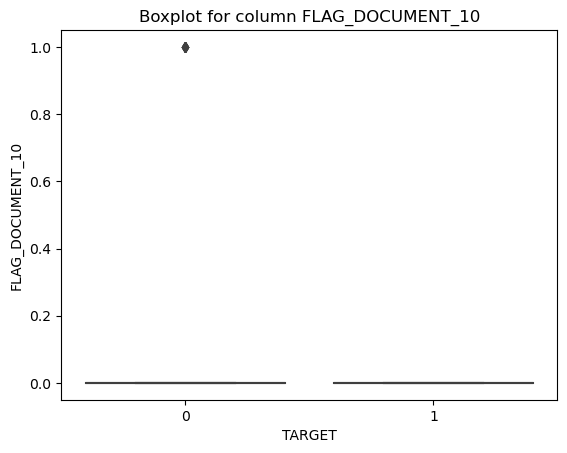

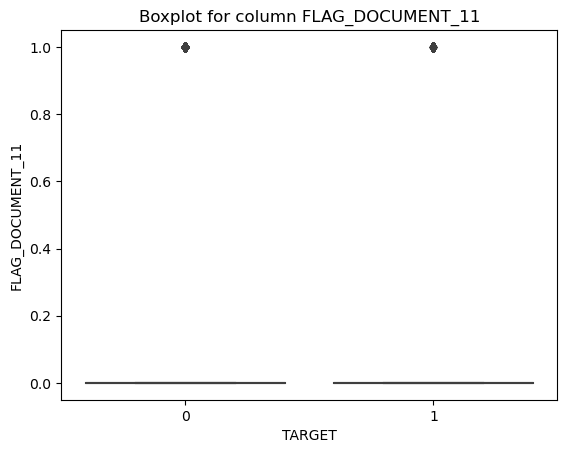

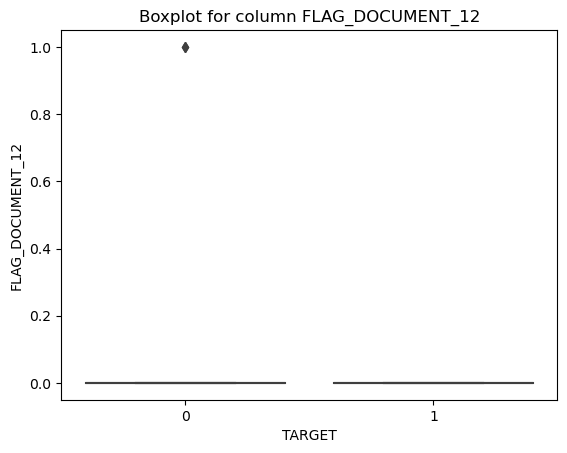

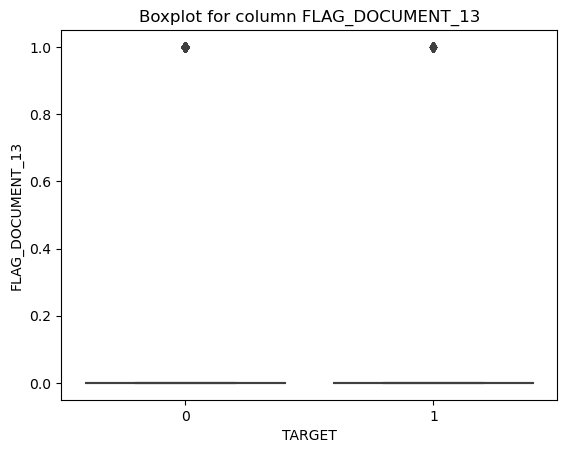

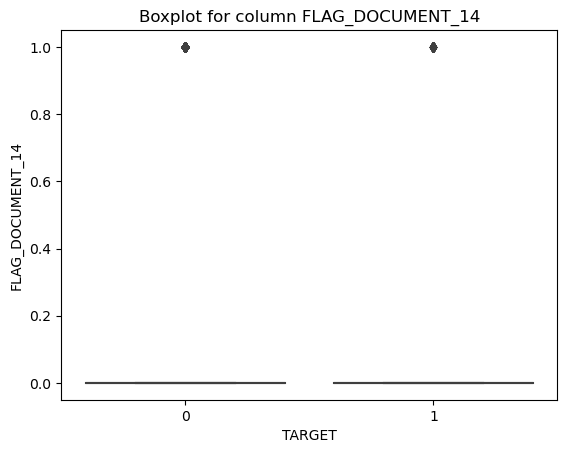

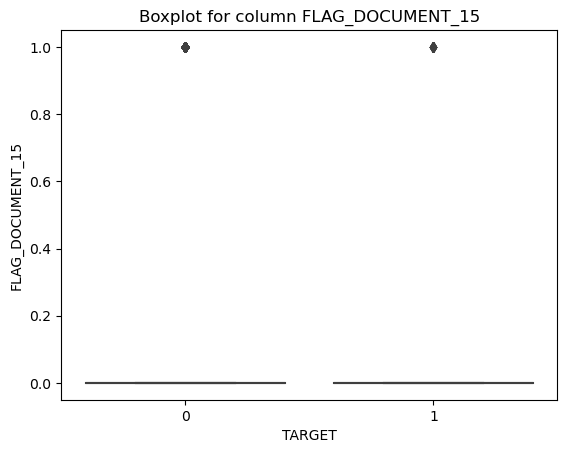

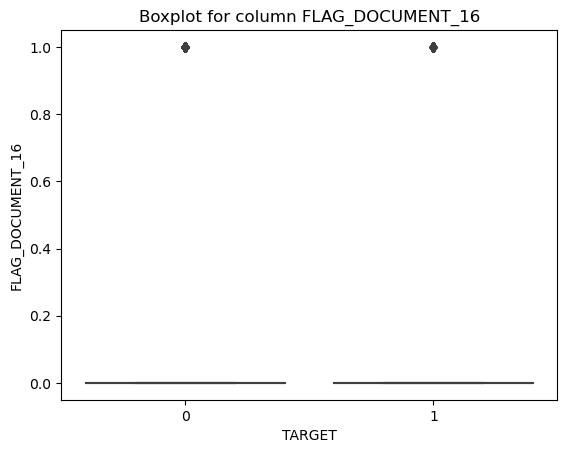

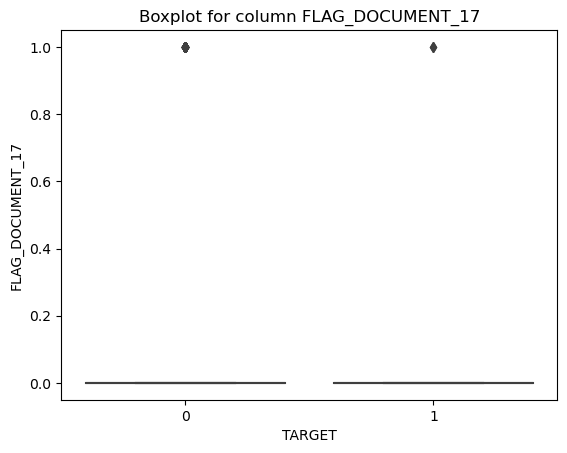

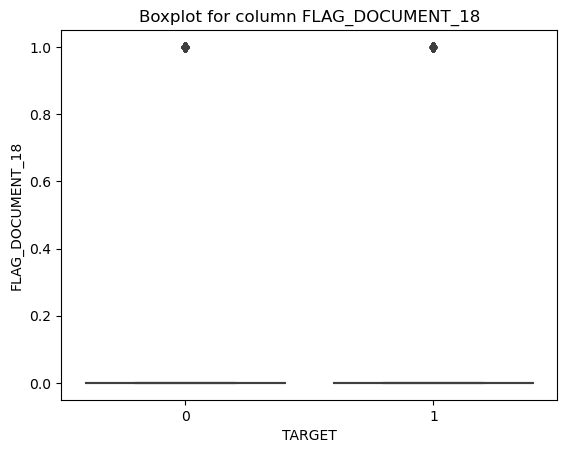

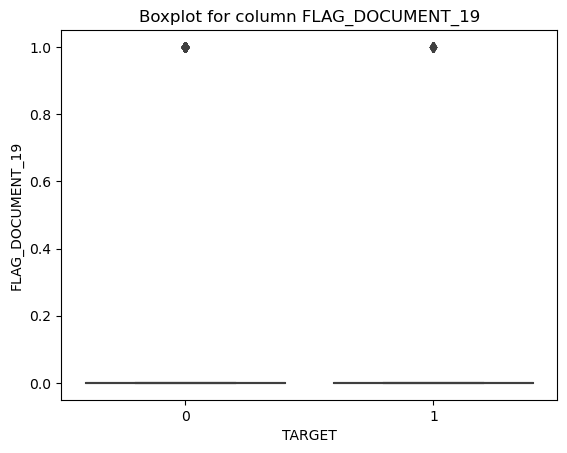

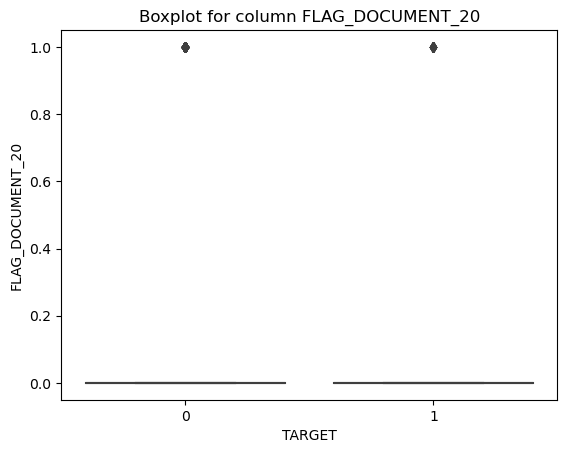

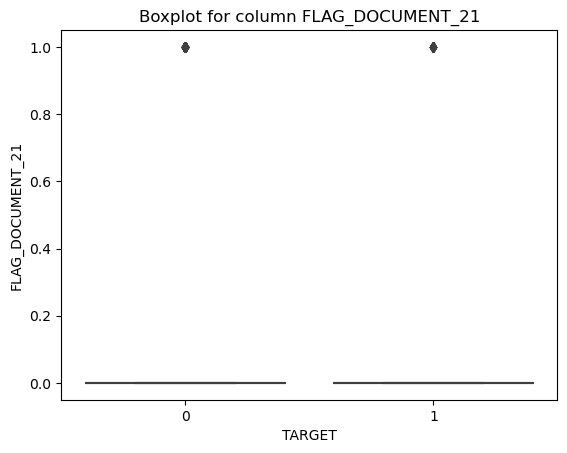

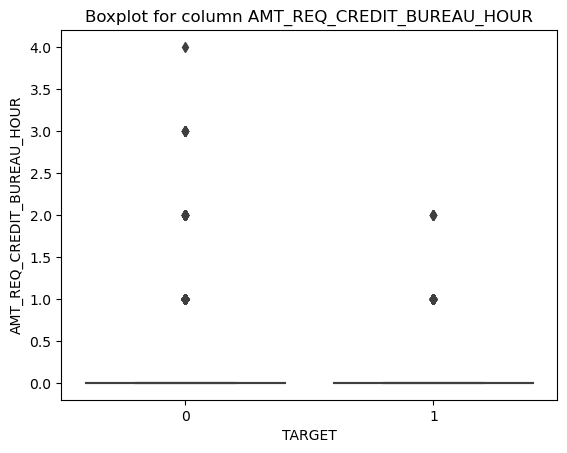

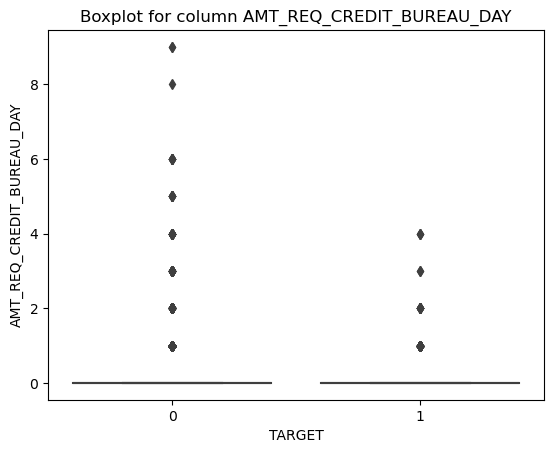

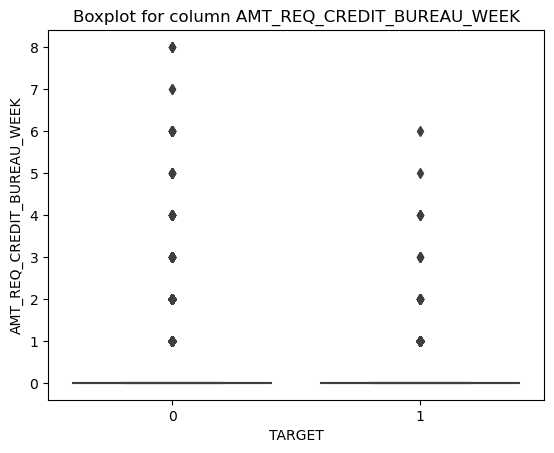

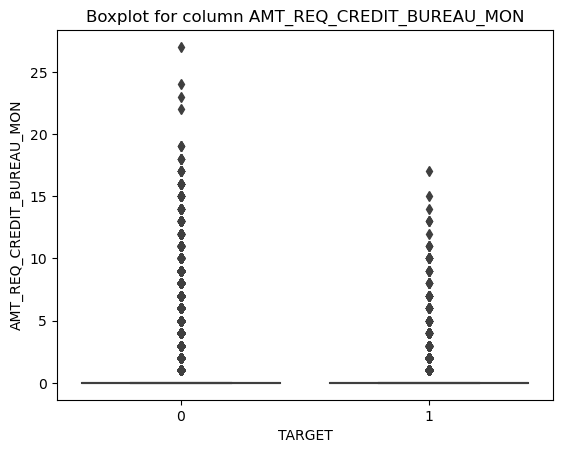

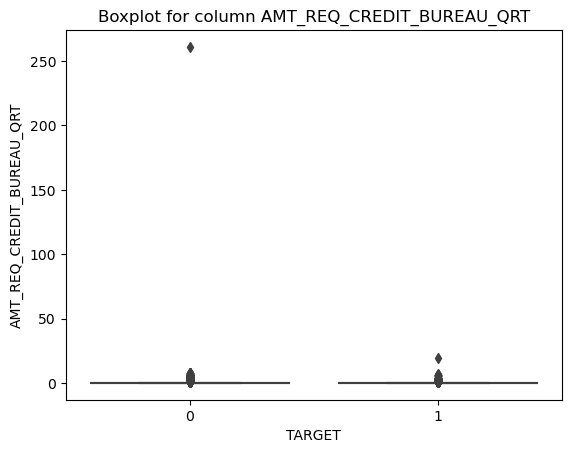

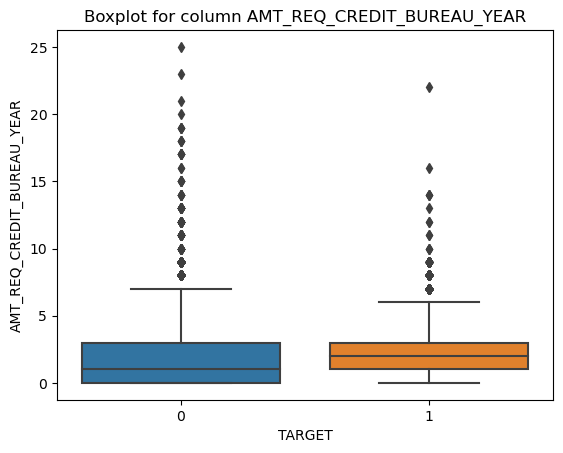

In [38]:
for column in num_cols:
    sns.boxplot(x=application_train['TARGET'],y=application_train[column])
    plt.title(f"Boxplot for column {column}")
    plt.show()

we have observed some outliers in the dataset such as  'CNT_CHILDREN', 'AMT_GOODS_PRICE','AMT_CREDIT', 'REGION_POPULATION_RELATIVE','DAYS_REGISTRATION ', 'OWN_CAR_AGE', 'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE', in the dataset.

In [39]:
from scipy.stats import zscore #to compute zscore
#zscore to find Outliers
numerical_columns = application_train.select_dtypes(include=[float, int]).columns
train_zscore = application_train[numerical_columns].apply(zscore)
train_zscore

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,-1.733423,3.374485,-0.577538,0.142129,-0.478095,NaN,NaN,-0.149452,1.506880,-0.456215,...,-0.090534,-0.024402,-0.022529,-0.018305,NaN,NaN,NaN,NaN,NaN,NaN
1,-1.733413,-0.296342,-0.577538,0.426792,1.725450,NaN,NaN,-1.252750,-0.166821,-0.460115,...,-0.090534,-0.024402,-0.022529,-0.018305,NaN,NaN,NaN,NaN,NaN,NaN
2,-1.733403,-0.296342,-0.577538,-0.427196,-1.152888,NaN,NaN,-0.783451,-0.689509,-0.453299,...,-0.090534,-0.024402,-0.022529,-0.018305,NaN,NaN,NaN,NaN,NaN,NaN
3,-1.733384,-0.296342,-0.577538,-0.142533,-0.711430,NaN,NaN,-0.928991,-0.680114,-0.473217,...,-0.090534,-0.024402,-0.022529,-0.018305,NaN,NaN,NaN,NaN,NaN,NaN
4,-1.733374,-0.296342,-0.577538,-0.199466,-0.213734,NaN,NaN,0.563570,-0.892535,-0.473210,...,-0.090534,-0.024402,-0.022529,-0.018305,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,1.732372,-0.296342,-0.577538,-0.047646,-0.855489,NaN,NaN,0.845396,1.537586,-0.453377,...,-0.090534,-0.024402,-0.022529,-0.018305,NaN,NaN,NaN,NaN,NaN,NaN
307507,1.732381,-0.296342,-0.577538,-0.408219,-0.818594,NaN,NaN,0.310593,-1.085707,2.133617,...,-0.090534,-0.024402,-0.022529,-0.018305,NaN,NaN,NaN,NaN,NaN,NaN
307508,1.732391,-0.296342,-0.577538,-0.066623,0.195379,NaN,NaN,-1.147120,0.245417,-0.507774,...,-0.090534,-0.024402,-0.022529,-0.018305,NaN,NaN,NaN,NaN,NaN,NaN
307509,1.732401,3.374485,-0.577538,0.009287,-0.568757,NaN,NaN,-1.124635,0.934008,-0.485583,...,-0.090534,-0.024402,-0.022529,-0.018305,NaN,NaN,NaN,NaN,NaN,NaN


Z-scores are a helpful descriptive statistics tool. They can be applied to compare data points from various distributions, find outliers, and determine the likelihood that a given data point will occur.reveals the number of standard deviations that a specific data point deviates from the mean. <br>
z-score of 0 - data point is equal to the mean<br>
z-score of 1 -  data point is one standard deviation above the mean. <br>
z-score of -1 -  data point is one standard deviation below the mean.<br>
z-score of NaN- indicate that the columns in our dataset have a constant value and/or contain missing values.<br> 
Prior to modeling the dataset, we will think about removing columns like Target and consider replacing missing values.

<a class="anchor" id="missing"></a>

# **7. Missing data**


In [40]:
# Calculate the count of missing values for each column
count_missing = application_train.isnull().sum().sort_values(ascending=False)

# Total number of rows in the DataFrame
Total = application_train.isnull().count()

# Calculate the percentage of missing values for each column
percent = (application_train.isnull().sum() / Total * 100).sort_values(ascending=False)

# Create a DataFrame to store the missing values information
missing_train_data = pd.concat(
    [count_missing, Total, np.round(percent, 2)],
    axis=1,
    keys=['Count of Missing Values', 'Total', 'Percent']
)

# Display the top 50 rows of the missing values information
print(missing_train_data.head(50))

                              Count of Missing Values   Total  Percent
COMMONAREA_MEDI                                214865  307511    69.87
COMMONAREA_AVG                                 214865  307511    69.87
COMMONAREA_MODE                                214865  307511    69.87
NONLIVINGAPARTMENTS_MODE                       213514  307511    69.43
NONLIVINGAPARTMENTS_AVG                        213514  307511    69.43
NONLIVINGAPARTMENTS_MEDI                       213514  307511    69.43
FONDKAPREMONT_MODE                             210295  307511    68.39
LIVINGAPARTMENTS_MODE                          210199  307511    68.35
LIVINGAPARTMENTS_AVG                           210199  307511    68.35
LIVINGAPARTMENTS_MEDI                          210199  307511    68.35
FLOORSMIN_AVG                                  208642  307511    67.85
FLOORSMIN_MODE                                 208642  307511    67.85
FLOORSMIN_MEDI                                 208642  307511    67.85
YEARS_

In [41]:
len(missing_train_data[missing_train_data.Percent > 50])

41

A column is typically considered to be too noisy and unreliable for meaningful analysis when the null value percentage exceeds 50%. In this dataset we have 41 such columns. Therefore, it is wise to think about excluding those columns from further analysis.

<a class="anchor" id="Handling_Missing_Values"></a>

## *7.1 Handling Missing Values*

In [42]:
# Count of 'N' and 'Y' values in 'FLAG_OWN_CAR' column
car_ownership_counts = application_train['FLAG_OWN_CAR'].value_counts()

# Display the counts of 'N' and 'Y' in 'FLAG_OWN_CAR'
print(car_ownership_counts)

# Fill missing values in 'OWN_CAR_AGE' with 0
application_train['OWN_CAR_AGE'] = application_train['OWN_CAR_AGE'].fillna(0)

# Define bins for categorizing car age
bins = [-float('inf'), 0, 10, float('inf')]

# Create a new column 'CAR_AGE_BINS' based on the bins
application_train['CAR_AGE_BINS'] = pd.cut(application_train['OWN_CAR_AGE'], bins=bins, labels=['0', '0-10', '>10'])

# Display the first 10 rows of 'CAR_AGE_BINS' and 'OWN_CAR_AGE'
print(application_train[['CAR_AGE_BINS', 'OWN_CAR_AGE']].head(10))

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
  CAR_AGE_BINS  OWN_CAR_AGE
0            0          0.0
1            0          0.0
2          >10         26.0
3            0          0.0
4            0          0.0
5            0          0.0
6          >10         17.0
7         0-10          8.0
8            0          0.0
9            0          0.0


It creates a new column called "CAR_AGE_BINS," defines bins for classifying car age, and fills all null values within the "OWN_CAR_AGE" column with 0. 

<a class="anchor" id="dropping"></a>

## *7.2 Dropping columns with missing data*

In [43]:
train_transform = missing_train_data[missing_train_data.Percent > 50]
missing_train_transform = list(train_transform.index)
missing_train_transform.remove("OWN_CAR_AGE")
train_transfored_df=application_train.drop(missing_train_transform, axis=1)
train_transfored_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CAR_AGE_BINS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,>10
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0,0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0


<a class="anchor" id="join_data"></a>

# *8. Joining Dataset - Train Dataset with Bureau Dataset*

<a class="anchor" id="bureau2"></a>

## *8.1 Observing the Bureau Dataset*

In [44]:
print(bureau.describe())

         SK_ID_CURR  SK_ID_BUREAU   DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
count  1.716428e+06  1.716428e+06  1.716428e+06        1.716428e+06   
mean   2.782149e+05  5.924434e+06 -1.142108e+03        8.181666e-01   
std    1.029386e+05  5.322657e+05  7.951649e+02        3.654443e+01   
min    1.000010e+05  5.000000e+06 -2.922000e+03        0.000000e+00   
25%    1.888668e+05  5.463954e+06 -1.666000e+03        0.000000e+00   
50%    2.780550e+05  5.926304e+06 -9.870000e+02        0.000000e+00   
75%    3.674260e+05  6.385681e+06 -4.740000e+02        0.000000e+00   
max    4.562550e+05  6.843457e+06  0.000000e+00        2.792000e+03   

       DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
count         1.610875e+06       1.082775e+06            5.919400e+05   
mean          5.105174e+02      -1.017437e+03            3.825418e+03   
std           4.994220e+03       7.140106e+02            2.060316e+05   
min          -4.206000e+04      -4.202300e+04            0.000000e+0

<a class="anchor" id="missing_bureau2"></a>

## *8.2 Missing values in Bureau Dataset*

In [45]:
#Outputting the Count of Null Values in Each Column for Bureau Dataset
print(bureau.isnull().sum())


SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64


<a class="anchor" id="commoncol"></a>

## *8.3 Common Coloumns in Train and Bureau Dataset*

In [46]:
# Identifying common columns between 'bureau' and 'application_train'
common_cols = list(set(bureau.columns) & set(application_train.columns))

# Displaying Common Columns:
print("Common Columns among Train and Bureau Dataset:")
for c_columns in common_cols:
    print(c_columns)

Common Columns among Train and Bureau Dataset:
SK_ID_CURR
AMT_ANNUITY


<a class="anchor" id="mergedata"></a>

## *8.4 Merging Dataset*

In [47]:
#Joining Train dataset with Bureau Dataset
# Combine 'df' and 'df_bureau' based on 'SK_ID_CURR' with a left join
train_bureau_merge_df = application_train.merge(bureau, on='SK_ID_CURR', how='left')
train_bureau_merge_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,...,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY_y
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-1038.0,NaN,0.0,40761.0,NaN,NaN,0.0,Credit card,-1038.0,0.0
1,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-48.0,NaN,0.0,0.0,0.0,NaN,0.0,Credit card,-47.0,NaN
2,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-1185.0,0.000,0.0,135000.0,0.0,0.0,0.0,Consumer credit,-1185.0,0.0
3,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-911.0,3321.000,0.0,19071.0,NaN,NaN,0.0,Consumer credit,-906.0,0.0
4,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-36.0,5043.645,0.0,120735.0,0.0,0.0,0.0,Consumer credit,-34.0,0.0


In [48]:
print(train_bureau_merge_df.shape)

(1509345, 139)


<a class="anchor" id="mergernum"></a>

## **8.5 Correlation Target**


In [49]:
rev_correlation_matrix = train_bureau_merge_df.corr()
correlation_target2 = rev_correlation_matrix["TARGET"].sort_values(ascending= False)
correlation_target2.head(30)

TARGET                         1.000000
DAYS_BIRTH                     0.067763
DAYS_CREDIT                    0.061556
REGION_RATING_CLIENT_W_CITY    0.051181
REGION_RATING_CLIENT           0.049232
DAYS_LAST_PHONE_CHANGE         0.043480
DAYS_ID_PUBLISH                0.043160
DAYS_CREDIT_UPDATE             0.041076
REG_CITY_NOT_WORK_CITY         0.040726
FLAG_DOCUMENT_3                0.039740
DAYS_ENDDATE_FACT              0.039057
REG_CITY_NOT_LIVE_CITY         0.036777
FLAG_EMP_PHONE                 0.034586
DAYS_REGISTRATION              0.033142
DEF_30_CNT_SOCIAL_CIRCLE       0.026937
LIVE_CITY_NOT_WORK_CITY        0.026769
DAYS_CREDIT_ENDDATE            0.026497
AMT_REQ_CREDIT_BUREAU_YEAR     0.025837
DEF_60_CNT_SOCIAL_CIRCLE       0.024861
FLAG_WORK_PHONE                0.020919
CNT_CHILDREN                   0.016816
CNT_FAM_MEMBERS                0.012886
OBS_30_CNT_SOCIAL_CIRCLE       0.011998
OBS_60_CNT_SOCIAL_CIRCLE       0.011930
AMT_CREDIT_SUM_OVERDUE         0.006253


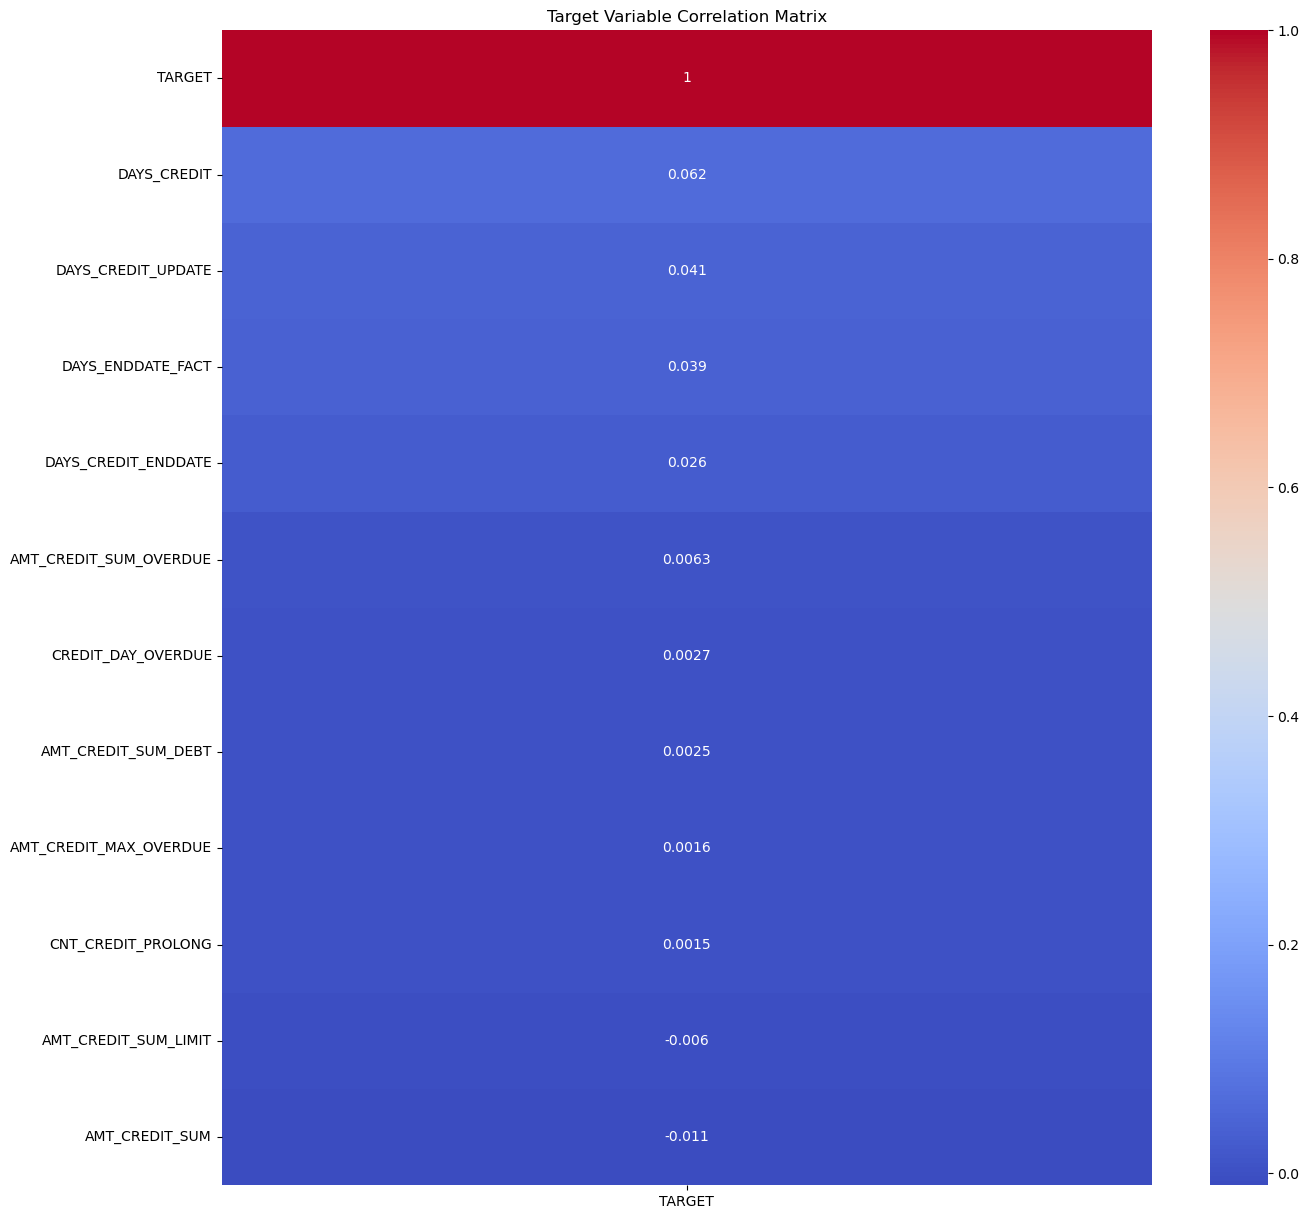

In [50]:
 # Analyze numerical columns
numerical_columns = ['DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT',
                    'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM',
                     'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE',
                    'DAYS_CREDIT_UPDATE']

#Investigate correlations
correlation_matrix = train_bureau_merge_df[numerical_columns + ['TARGET']].corr()
target_correlation_matrix = correlation_matrix['TARGET']
sorted_correlation = target_correlation_matrix.sort_values(ascending=False)
plt.figure(figsize=(15, 15))
sns.heatmap(sorted_correlation.to_frame(), annot=True, cmap='coolwarm')
plt.title('Target Variable Correlation Matrix')
plt.show()

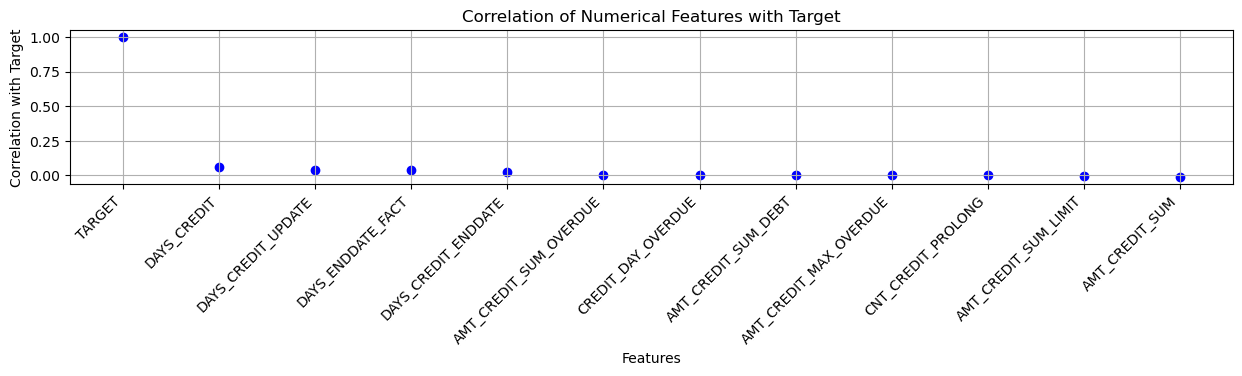

In [51]:
# Assuming train_bureau_merge_df is your DataFrame
numerical_columns = ['DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT',
                      'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM',
                      'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE',
                      'DAYS_CREDIT_UPDATE']

# Investigate correlations
correlation_matrix = train_bureau_merge_df[numerical_columns + ['TARGET']].corr()
target_correlation_matrix = correlation_matrix['TARGET']
sorted_correlation = target_correlation_matrix.sort_values(ascending=False)

# Create a scatterplot
plt.figure(figsize=(15, 2))
plt.scatter(sorted_correlation.index, sorted_correlation.values, color='blue')
plt.title('Correlation of Numerical Features with Target')
plt.xlabel('Features')
plt.ylabel('Correlation with Target')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


In the above plot negative correlation is denoted by blue shades, while a positive correlation is denoted by red shades. Darker colors signify weaker correlations, while lighter colors signify stronger correlations. Hence, by examining the heatmap,  **'days_credit'** is having the strongest correlations (positive correlation)with the **'TARGET'** variable.<br>
1 indicates a perfect positive correlation,<br>
-1 indicates a perfect negative correlation,<br>
0 indicates no correlation.<br>
Positive correlations suggest that as the numerical feature increases, the likelihood of the target being positive also increases, and vice versa for negative correlations.

<a class="anchor" id="result"></a>

## **9. Result**

The project's success is dependent on the model's ability to predict loan defaults and its practical applicability, which is greatly aided by the Exploratory Data Analysis (EDA). This critical step revealed details in the dataset, which guided subsequent modeling decisions. These findings highlight key clientele trends, such as the strong repayment tendencies of 'Businessman' and 'Student' Clients. . 'Female Clients' have a proclivity for loans with consistent repayments, whereas 'Married' people and those living in a 'House/Apartment' have positive correlations with loan repayment.Conversely,  a red flag is raised for the 'Maternity Leave' category, where a significant proportion defaults, necessitating targeted mitigation strategies.

The exploration extends to the "Bureau dataset," potentially derived from a credit bureau, This dataset contains a large amount of missing values like 'AMT_CREDIT_MAX_OVERDUE' and 'AMT_ANNUITY.' A heatmap analysis emphasizes 'days_credit' as significantly positively correlated with the 'TARGET' variable, underlining its crucial role in assessing credit risk. The robustness of the dataset is strengthened by how outliers and missing values are handled during EDA. Features with marginal relevance and more than 50% of missing data are carefully excluded to protect the integrity of the data. Then, imputation techniques are used to preserve important data in columns with up to 50% missing data. The resilient dataset produced by this meticulous process provides a strong basis for further analysis and strengthens the model's capability to precisely predict loan defaults, improving its applicability in the real world.

**In summary,** my exploratory data analysis (EDA) revealed robust associations between the TARGET variable and several key features, namely AMT_CREDIT, AMT_ANNUITY, DAY_CREDIT, NAME_INCOME_TYPE, and NAME_HOUSING_TYPE. These findings suggest a noteworthy correlation between these specific variables and the target outcome.

**Future Analysis:** Prior to model development, thorough data cleaning involves removing irrelevant columns and addressing issues in pertinent columns with null or outlying data. Subsequently, employing industry-leading methods, I'll compare basic models to identify the most promising one. Following the CRISP-DM lifecycle, I'll reassess the business problem and available data to ensure no major changes are needed before fine-tuning the model. Additionally, I’ll review data beyond the current train and test sets to avoid overlooking relevant information.
